In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

__У нас есть 2 датасета с данными:__

1) датасет с imdb c информацией о 10000 фильмов


2) датасет из Кинопоиска с 10000 фильмами

## Шаг 3: Предварительная обработка данных + часть EDA из шага 4

### Посмотрим на 1 датасет

In [2]:
df_imdb = pd.read_csv('IMDB.csv', sep=',')
df_imdb

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
0,Побег из Шоушенка,1994,142,['Drama'],9.3,2751184,16+,82,28341469
1,Тёмный рыцарь,2008,152,"['Action', 'Crime', 'Drama']",9.0,2723913,14+,84,534858444
2,Начало,2010,148,"['Action', 'Adventure', 'Sci-Fi']",8.8,2417730,12+,74,292576195
3,Бойцовский клуб,1999,139,['Drama'],8.8,2190763,18+,66,37030102
4,Форрест Гамп,1994,142,"['Drama', 'Romance']",8.8,2140265,0+,82,330252182
...,...,...,...,...,...,...,...,...,...
10042,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1127056,16+,68,678815482
10043,Терминатор 2: Судный день,1991,137,"['Action', 'Sci-Fi']",8.6,1125044,16+,75,204843350
10044,Шоу Трумана,1998,103,"['Comedy', 'Drama']",8.2,1119501,0+,90,125618201
10045,Подозрительные лица,1995,106,"['Crime', 'Drama', 'Mystery']",8.5,1105828,16+,77,23341568


 __Описание колонок:__

- `title` — название фильма
- `year` — дата релиза
- `runtime`  — длительность фильма
- `genre` — жанры фильма
- `imdb_rating` — IMDb рейтинг фильма
- `votes` — количество поставленных оценок фильму
- `certificate` — возрастное ограничение фильма
- `metascore` — рейтинг, на основе отзывов кинокритиков на сайте Metacritic.com
- `gross` — мировые сборы фильма

Посмотрим, какие типы данных содержат наши столбцы

In [3]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10047 entries, 0 to 10046
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        10047 non-null  object 
 1   year         10047 non-null  int64  
 2   runtime      10047 non-null  int64  
 3   genre        10047 non-null  object 
 4   imdb_rating  10047 non-null  float64
 5   votes        10047 non-null  int64  
 6   certificate  7381 non-null   object 
 7   metascore    10047 non-null  int64  
 8   gross        10047 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 706.6+ KB


Заметим, что в колонке 'certifucate' встречаются NaN значения

Проверим, что в наших данных фильмы не дублируются

In [4]:
duplicates = df_imdb.duplicated(subset='title')
duplicates.sum()

447

In [5]:
duplicates = df_imdb.loc[df_imdb.duplicated(subset='title'), :]
duplicates

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
451,Бэтмен,1989,126,"['Action', 'Adventure']",7.5,388195,NaN,69,251188924
539,Славные парни,2016,116,"['Action', 'Comedy', 'Crime']",7.3,343531,16+,70,36261763
561,Жизнь прекрасна,2011,100,"['Comedy', 'Drama', 'Romance']",7.6,336279,R,72,35014192
592,Красавица и чудовище,2017,129,"['Adventure', 'Family', 'Fantasy']",7.1,320140,16+,65,504014165
727,Аладдин,2019,128,"['Adventure', 'Comedy', 'Family']",6.9,276953,6+,53,355559216
...,...,...,...,...,...,...,...,...,...
10042,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1127056,16+,68,678815482
10043,Терминатор 2: Судный день,1991,137,"['Action', 'Sci-Fi']",8.6,1125044,16+,75,204843350
10044,Шоу Трумана,1998,103,"['Comedy', 'Drama']",8.2,1119501,0+,90,125618201
10045,Подозрительные лица,1995,106,"['Crime', 'Drama', 'Mystery']",8.5,1105828,16+,77,23341568


По названию фильма нашлось 447 дубликатов

Проверим, что это и правда дубликаты, а не просто фильмы с одинаковыми названиями:

In [6]:
df_imdb[df_imdb['title'] == 'Мстители: Война бесконечности']

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
45,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1127056,16+,68,678815482
10042,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1127056,16+,68,678815482


In [7]:
df_imdb[df_imdb['title'] == 'Бэтмен']

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
148,Бэтмен,2022,176,"['Action', 'Crime', 'Drama']",7.8,702826,16+,72,369345583
451,Бэтмен,1989,126,"['Action', 'Adventure']",7.5,388195,NaN,69,251188924


Кажется, и правда есть проблемы, но не со всеми фильмами. Некоторые повторяются только по названию

Попробуем проверять не только по названию, а еще по дате выхода и по длительности

In [8]:
duplicates_2 = df_imdb.duplicated(subset=['title', 'year', 'runtime'])
duplicates_2.sum()

50

Удалим дубликаты из нашего датасета

In [9]:
df_imdb = df_imdb[~duplicates_2]
df_imdb

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
0,Побег из Шоушенка,1994,142,['Drama'],9.3,2751184,16+,82,28341469
1,Тёмный рыцарь,2008,152,"['Action', 'Crime', 'Drama']",9.0,2723913,14+,84,534858444
2,Начало,2010,148,"['Action', 'Adventure', 'Sci-Fi']",8.8,2417730,12+,74,292576195
3,Бойцовский клуб,1999,139,['Drama'],8.8,2190763,18+,66,37030102
4,Форрест Гамп,1994,142,"['Drama', 'Romance']",8.8,2140265,0+,82,330252182
...,...,...,...,...,...,...,...,...,...
9992,Астерикс и тайное зелье,2018,87,"['Animation', 'Adventure', 'Comedy']",6.7,10610,6+,0,1271953
9993,Незнакомец,2015,102,"['Action', 'Adventure', 'Crime']",6.6,10610,NaN,0,0
9994,Тайна Мунакра,2008,103,"['Adventure', 'Family', 'Fantasy']",6.0,10606,PG,0,0
9995,Открытые сердца,2002,113,"['Drama', 'Romance']",7.5,10606,16+,77,122308


In [10]:
duplicates_3 = df_imdb.duplicated(subset=['title', 'year', 'runtime'])
duplicates_3.sum()

0

Ура, дубликатов нет

Посмотрим на характеристики наших данных

In [11]:
df_imdb.describe()

,year,runtime,imdb_rating,votes,metascore,gross
count,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9.997000e+03
mean,2001.706512,110.321797,6.603751,9.202926e+04,46.718916,2.918596e+07
std,18.136280,21.914139,1.009189,1.681804e+05,28.062024,5.978706e+07
min,1915.000000,45.000000,1.000000,1.060500e+04,0.000000,0.000000e+00
25%,1994.000000,95.000000,6.000000,1.768000e+04,30.000000,0.000000e+00
50%,2007.000000,106.000000,6.700000,3.493900e+04,52.000000,4.859475e+06
75%,2015.000000,120.000000,7.300000,9.027300e+04,68.000000,3.386001e+07
max,2023.000000,439.000000,9.300000,2.751184e+06,100.000000,9.366622e+08


Заметим, что минимальное значение для признаков metascore и gross равняется 0. Возможно данные по таким фильмам просто отсутсвуют. Посмотрим на эти данные поближе и решим, что будем с ними делать, позже

**Теперь разберемся со столбцом 'genre'**, так как сейчас в качестве значений у нас список жанров

In [12]:
df_imdb['genre']

0                                  ['Drama']
1               ['Action', 'Crime', 'Drama']
2          ['Action', 'Adventure', 'Sci-Fi']
3                                  ['Drama']
4                       ['Drama', 'Romance']
                        ...                 
9992    ['Animation', 'Adventure', 'Comedy']
9993        ['Action', 'Adventure', 'Crime']
9994      ['Adventure', 'Family', 'Fantasy']
9995                    ['Drama', 'Romance']
9996        ['Action', 'Adventure', 'Drama']
Name: genre, Length: 9997, dtype: object

In [13]:
df_imdb['genre_1'], df_imdb['genre_2'], df_imdb['genre_3'] = df_imdb['genre'].str.strip("[]").str.split(", ", 2).str

In [14]:
df_imdb['genre_1'] = df_imdb['genre_1'].str.strip("''")
df_imdb['genre_2'] = df_imdb['genre_2'].str.strip("''")
df_imdb['genre_3'] = df_imdb['genre_3'].str.strip("''")

 Метод str.strip("[]") удаляет квадратные скобки из значения в столбце 'genre', оставляя только список жанров в виде строки. Затем метод str.split(", ", 2) разбивает строку на отдельные элементы, используя запятую и пробел в качестве разделителя. Параметр 2 указывает, что нужно разбить строку на три части.

In [15]:
df_imdb.drop('genre', axis=1, inplace=True)

Посмотрим, сколько NaN появилось в новых столбцах (также помним, что пустые значения еще были в колонке 'certificate')

In [16]:
df_imdb.isna().sum()

title             0
year              0
runtime           0
imdb_rating       0
votes             0
certificate    2666
metascore         0
gross             0
genre_1           0
genre_2         810
genre_3        3319
dtype: int64

Для начала заполним все NaN пустой строкой и проверим, что пропусков не осталось

In [17]:
df_imdb = df_imdb.fillna('')
df_imdb.isna().sum()

title          0
year           0
runtime        0
imdb_rating    0
votes          0
certificate    0
metascore      0
gross          0
genre_1        0
genre_2        0
genre_3        0
dtype: int64

In [18]:
df_imdb

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,Побег из Шоушенка,1994,142,9.3,2751184,16+,82,28341469,Drama,,
1,Тёмный рыцарь,2008,152,9.0,2723913,14+,84,534858444,Action,Crime,Drama
2,Начало,2010,148,8.8,2417730,12+,74,292576195,Action,Adventure,Sci-Fi
3,Бойцовский клуб,1999,139,8.8,2190763,18+,66,37030102,Drama,,
4,Форрест Гамп,1994,142,8.8,2140265,0+,82,330252182,Drama,Romance,
...,...,...,...,...,...,...,...,...,...,...,...
9992,Астерикс и тайное зелье,2018,87,6.7,10610,6+,0,1271953,Animation,Adventure,Comedy
9993,Незнакомец,2015,102,6.6,10610,,0,0,Action,Adventure,Crime
9994,Тайна Мунакра,2008,103,6.0,10606,PG,0,0,Adventure,Family,Fantasy
9995,Открытые сердца,2002,113,7.5,10606,16+,77,122308,Drama,Romance,


**Посмотрим, какие жанры представлены в нашем датасете**

In [19]:
g_1 = df_imdb['genre_1'].unique()
g_1

array(['Drama', 'Action', 'Crime', 'Adventure', 'Biography', 'Mystery',
       'Animation', 'Comedy', 'Horror', 'Fantasy', 'Sci-Fi', 'Western',
       'Romance', 'Family', 'Film-Noir', 'Thriller', 'Music', 'War',
       'History'], dtype=object)

In [20]:
g_2 = df_imdb['genre_2'].unique()
g_2

array(['', 'Crime', 'Adventure', 'Romance', 'Drama', 'Sci-Fi', 'Western',
       'Comedy', 'War', 'Mystery', 'Thriller', 'Horror', 'Music',
       'Family', 'Fantasy', 'Action', 'Sport', 'Biography', 'Musical',
       'History', 'Film-Noir'], dtype=object)

In [21]:
g_3 = df_imdb['genre_3'].unique()
g_3

array(['', 'Drama', 'Sci-Fi', 'Thriller', 'Mystery', 'War', 'Crime',
       'Fantasy', 'History', 'Comedy', 'Family', 'Romance', 'Music',
       'Horror', 'Adventure', 'Sport', 'Musical', 'Western', 'Biography',
       'Film-Noir', 'Action'], dtype=object)

In [22]:
set(list(g_1) + list(g_2) + list(g_3))

{'',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Посмотрим, что это за жанры

- `''` — жанр неизвестен
- `Action` — Экшн или Боевик
- `Adult`  — Для взрослых
- `Adventure` — Приключения
- `Animation` — Анимационный
- `Biography` — Биография
- `Comedy` — Комедия
- `Crime` — Криминал
- `Drama` — Драма
- `Family` — Семейный
- `Fantasy`  — Фэнтези
- `Film-Noir` — Фильм-нуар
- `History` — Исторический
- `Horror` — Ужасы
- `Music` — Музыка
- `Musical` — Мьюзикл
- `Mystery` — Мистика
- `Romance` — Романтика
- `Sci-Fi'` — Научная фантастика
- `Sport` — Спорт
- `Thriller` — Триллер
- `War` — Военный
- `Western` — Вестерн

In [23]:
g_1 = pd.DataFrame(df_imdb.groupby('genre_1')['title'].count().sort_values(ascending=False)).reset_index()
g_2 = pd.DataFrame(df_imdb.groupby('genre_2')['title'].count().sort_values(ascending=False)).reset_index()
g_3 = pd.DataFrame(df_imdb.groupby('genre_3')['title'].count().sort_values(ascending=False)).reset_index()

In [24]:
g_1

,genre_1,title
0,Comedy,2542
1,Action,2414
2,Drama,1980
3,Crime,795
4,Biography,568
5,Adventure,549
6,Horror,502
7,Animation,484
8,Fantasy,62
9,Mystery,43


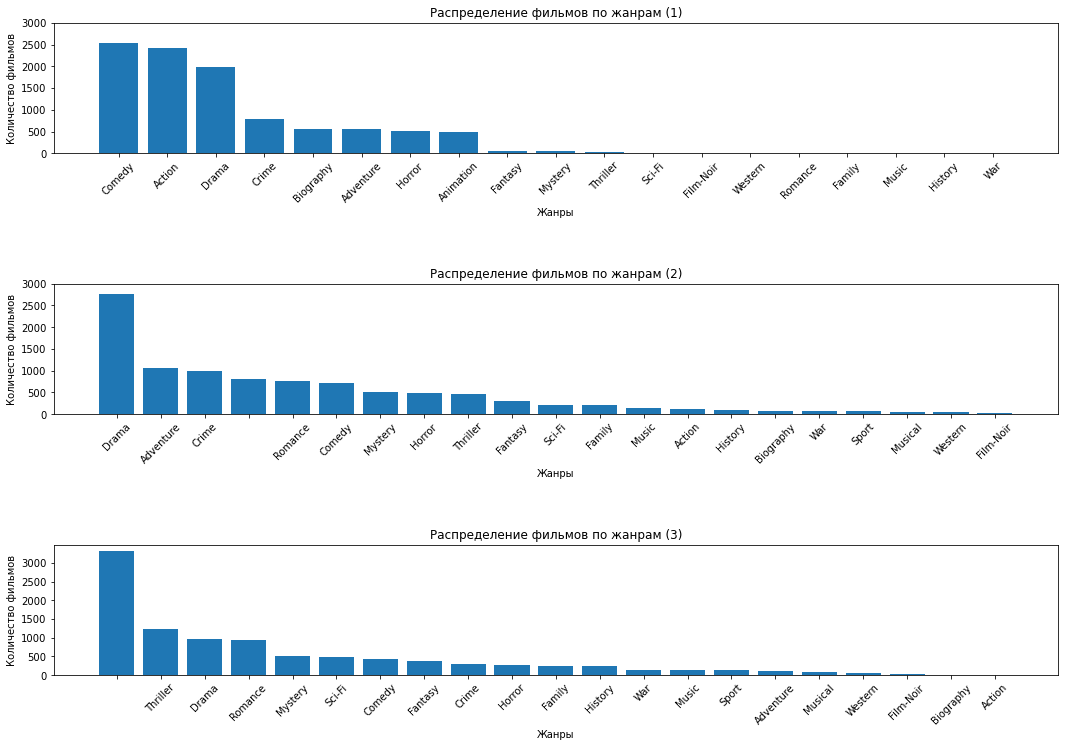

In [25]:
plt.subplots(3, 1, figsize=(18, 12))
plt.subplots_adjust(hspace=1)

plt.subplot(3, 1, 1)
plt.bar(g_1['genre_1'], g_1['title'])
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам (1)')
plt.xticks(rotation=45)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000]);

plt.subplot(3, 1, 2)
plt.bar(g_2['genre_2'], g_2['title'])
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам (2)')
plt.xticks(rotation=45)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000]);

plt.subplot(3, 1, 3)
plt.bar(g_3['genre_3'], g_3['title'])
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам (3)')
plt.xticks(rotation=45)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000]);

- Самый популярный жанр 1 - это Комедия
- Самый популярный жанр 2 - это Драма
- Самый популярный жанр 3 - Это Триллер 


Многие жанры встречаются только по 1 разу

Заметим, что для более чем 3000 фильмов 3 жанр не определен. 

При дальнейшей работе с данными можем удалить 3 столбец, так как при кодировании 3 столбцов с данными о жанрах количество столбцов слишком сильно увеличится, что нежелательно. Кроме того, первые два столбца содержат наиболее релевантные жанры для фильмов. 

Но финальное решение об удалении или не удалении 3 столбца с жанрами мы примем в следующем пункте после визуализации.

**Посмотрим, фильмы каких годов представлены в нашем датасете**

In [26]:
years = df_imdb['year'].unique()
years.sort()
years

array([1915, 1916, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

Представлены фильмы, выпущенные в промежуток с 1915 до 2023 года

Теперь посмотрим, фильмов каких лет больше всего

In [27]:
df_imdb['year'].value_counts().nlargest(10)

2018    356
2014    354
2016    342
2017    338
2013    334
2015    331
2019    328
2011    319
2007    304
2009    303
Name: year, dtype: int64

Больше всего фильмов, выпущенных примерно в период с 2013 до 2018

In [28]:
df_imdb['year'].value_counts().nsmallest(10)

1920    1
1922    1
1915    1
1916    1
1919    1
1926    2
1924    2
1921    2
1923    2
1929    2
Name: year, dtype: int64

Меньше всего старых фильмов, выпущенных с 1915 по 1930

Посмотрим по графику

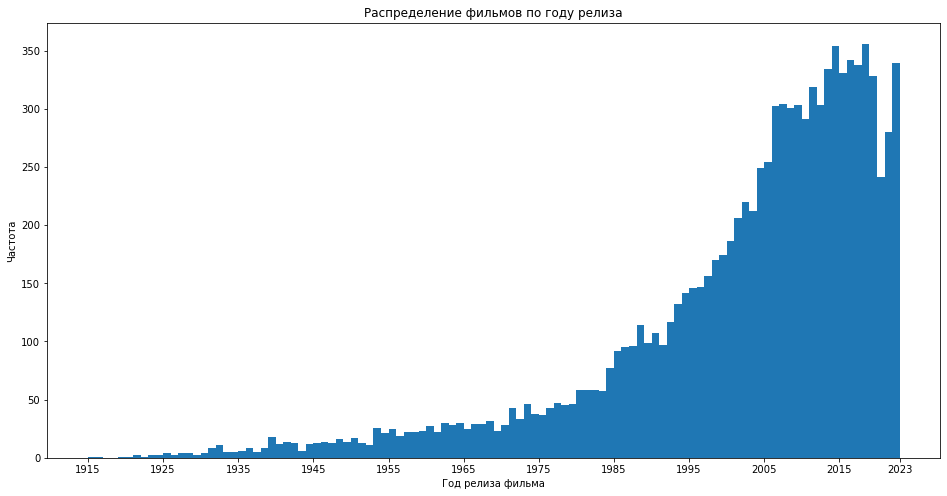

In [29]:
plt.figure(figsize=(16,8))
plt.hist(df_imdb['year'], bins=108)
plt.xticks([1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2023])
plt.ylabel('Частота')
plt.xlabel('Год релиза фильма')
plt.title('Распределение фильмов по году релиза');

По графику видим, что в нашем датасете представлены в большей степени современные фильмы. Чаще всего действительно встречаются фильмы, выпущенные в промежуток между 2010 и 2020 годами

**Теперь посмотрим на колонку 'runtime' с длительностью фильма**

In [30]:
runtime_list = df_imdb['runtime'].unique()
runtime_list.sort()
runtime_list

array([ 45,  46,  48,  50,  51,  55,  56,  57,  60,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196,
       197, 198, 201, 202, 204, 205, 206, 207, 209, 210, 212, 213, 216,
       218, 219, 220, 224, 229, 237, 238, 242, 247, 260, 271, 317, 321,
       366, 439], dtype=int64)

In [31]:
# Ради интереса посмотрим на этого монстра :)

df_imdb[df_imdb['runtime'] == 439]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
9384,Сатанинское танго,1994,439,8.2,11857,,0,0,Drama,,


Посмотрим на распределение по графику

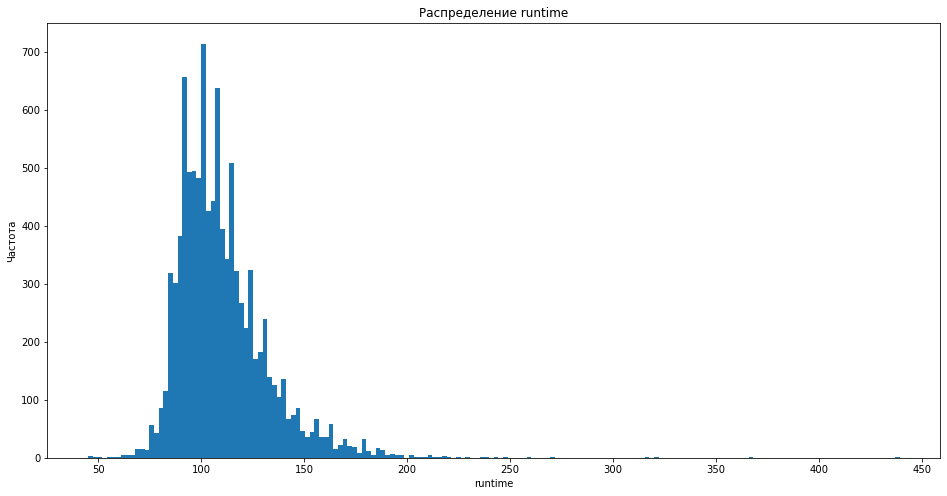

In [32]:
plt.figure(figsize=(16,8))
plt.hist(df_imdb['runtime'], bins=172)
plt.title('Распределение runtime')
plt.ylabel('Частота')
plt.xlabel('runtime');

По графику видно, что среди данных есть выбросы, чья длительность сильно отличается в большую сторону от большинства фильмов. Однако мы не будем их удалять, так как такие фильмы действительно существуют и их длительность может влиять на их рейтинг (в части машинного обучения)

Длительность большинства фильмов находится в промежутке от 70 минут до 120.

При дальнейшей работе с моделями машинного обучения можно будет разбить все фильмы по промежуткам времени на:
- короткометражные 
- среднеметражные
- полнометражные
- длительные
- очень длительные

**Поближе посмотрим на колонку 'votes' с количеством голосов с оценкой фильма**

In [33]:
df_imdb['votes'].dtypes

dtype('int64')

In [34]:
min_edge = df_imdb['votes'].min()
max_edge = df_imdb['votes'].max()

print('Признак votes содержит числовые значения в промежутке от', min_edge, 'до', max_edge)

Признак votes содержит числовые значения в промежутке от 10605 до 2751184


**Теперь поработаем с признаком 'certificate'**

In [35]:
df_imdb['certificate'].unique()

array(['16+', '14+', '12+', '18+', '0+', '6+', 'R', '', 'PG-13', 'PG',
       '16', '(Banned)', 'G', 'M/PG', 'NC-17', 'M', 'GP', 'Not Rated',
       'Unrated', 'Approved'], dtype=object)

Видим, что значения очень разноплановые, используются разные шкалы. Встречаются:
    
    - пустые строки, которыми мы сами в начале заполнили все пропуски
    - 'Not Rated' и 'Unrated', что одно и то же
    - '(Banned)'
    - 'Approved'
    - возрастная классификация ('0+', '6+', '12+', '14+', '16+', '18+')
    - МРАА классификация ('R', 'PG-13', 'PG', 'G', 'M/PG', 'NC-17', 'M', 'GP')
    - число 16

Для начала стандартизируем значения этого столбца, приведя ее к формату стандартной возрастной классификации

**1) Посмотрим на фильмы с пропусками:**

In [36]:
df_imdb[df_imdb['certificate'] == '']

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
238,The Kashmir Files,2022,170,8.7,569272,,0,0,Drama,,
254,Монти Пайтон и священный Грааль,1975,91,8.2,552527,,91,1229197,Adventure,Comedy,Fantasy
370,Аладдин,1992,90,8.0,438227,,86,217350219,Animation,Adventure,Comedy
403,Останься со мной,1986,89,8.1,418290,,75,52287414,Adventure,Drama,
451,Бэтмен,1989,126,7.5,388195,,69,251188924,Action,Adventure,
...,...,...,...,...,...,...,...,...,...,...,...
9985,Woman of the Year,1942,114,7.1,10622,,74,0,Comedy,Drama,Romance
9988,Emmanuelle,1974,94,5.2,10618,,0,8720000,Drama,Romance,
9991,Смелость сказать правду,2015,86,6.7,10612,,43,0,Comedy,Drama,
9993,Незнакомец,2015,102,6.6,10610,,0,0,Action,Adventure,Crime


Таких фильмов достаточно много, большинство из них содержит другую информацию в полном объеме, поэтому удалять их неразумно. 

В качестве решения, заполним все пропуски значением новой категорией 'Без в/о', что будет значить, что у фильма нет конкретного возрастного ограничения. 

Мы приняли такое решение, чтобы не накладывать на фильмы лишних ограничений, ставя какое-то возрастное ограничение

In [37]:
df_imdb.replace({'certificate': {'': 'Без в/о'}}, inplace=True)

In [38]:
df_imdb[df_imdb['certificate'] == ''].shape

(0, 11)

**2) Посмотрим на фильмы с 'Not Rated' и 'Unrated':**

In [39]:
NR = df_imdb[(df_imdb['certificate'] == 'Not Rated') | (df_imdb['certificate'] == 'Unrated')]
NR

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
5322,Бхарат,2019,150,4.7,31698,Not Rated,0,2971549,Action,Comedy,Drama
5417,Открытая могила,2013,102,6.2,30630,Unrated,33,0,Horror,Mystery,Sci-Fi
6686,Студент года 2,2019,146,2.2,21521,Not Rated,0,778566,Action,Comedy,Drama
7012,Jersey,2019,157,8.5,19912,Not Rated,0,0,Drama,Sport,
7418,"Бандит, полицейский, дьявол",2019,109,6.9,18030,Not Rated,65,216494,Action,Crime,Thriller
7614,Тень,2018,116,7.0,17155,Not Rated,81,521396,Action,Adventure,Fantasy
7820,Порок,2019,166,3.5,16343,Not Rated,0,2729336,Drama,Romance,
8859,Гладко на бумаге,2021,92,5.6,13120,Unrated,54,0,Comedy,Romance,
9416,Шахта 9,2019,83,6.0,11796,Not Rated,65,226421,Drama,Thriller,
9932,Женщина на войне,2018,101,7.4,10724,Not Rated,81,847495,Adventure,Comedy,Drama


In [40]:
NR.shape[0]

10

Таких фильмов не так много (10), поэтому заполним их рейтинги вручную, на основе информации, которую нам нашел ChatGPT (общение с ChatGPT на эту тему в файле 'ChatGPT.ipynb' под номером 1).

Вот какую информацию нам нашел ChatGPT:

- `Бхарат (2019):`                       16+

- `Открытая могила (2013):`	            18+

- `Студент года 2 (2019):`	            16+

- `Jersey (2019):`	                    12+

- `Бандит, полицейский, дьявол (2019):`	18+

- `Тень (2018):`	                      16+

- `Порок (2019):`	                    18+

- `Гладко на бумаге (2021):`	            16+

- `Шахта 9 (2019):`	                    16+

- `Женщина на войне (2018):`	            16+

In [41]:
age_rest = ['16+', '18+', '16+', '12+', '18+', '16+', '18+', '16+', '16+', '16+']

place = 0

for i in (list(NR['certificate'].index)):
    df_imdb['certificate'][i] = age_rest[place]
    place += 1

In [42]:
df_imdb.iloc[7820]

title            Порок
year              2019
runtime            166
imdb_rating        3.5
votes            16343
certificate        18+
metascore            0
gross          2729336
genre_1          Drama
genre_2        Romance
genre_3               
Name: 7820, dtype: object

In [43]:
df_imdb[(df_imdb['certificate'] == 'Not Rated') | (df_imdb['certificate'] == 'Unrated')].shape[0]

0

**3) Посмотрим на фильмы с (Banned):**

In [44]:
BA = df_imdb[df_imdb['certificate'] == '(Banned)']
BA

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
393,Борат,2006,84,7.4,423576,(Banned),89,128505958,Comedy,,
414,Кролик Джоджо,2019,108,7.9,411442,(Banned),58,33370906,Comedy,Drama,War
1050,"Южный Парк: Большой, длинный, необрезанный",1999,81,7.7,209914,(Banned),73,52037603,Animation,Comedy,Fantasy
1284,Метрополис,1927,153,8.3,178488,(Banned),98,1236166,Drama,Sci-Fi,
2148,Смерть Сталина,2017,107,7.2,107257,(Banned),88,8041828,Comedy,Drama,History
2357,Гроздья гнева,1940,129,8.1,96285,(Banned),96,55000,Drama,,
2975,Номер 44,2015,137,6.4,73230,(Banned),41,1206135,Crime,Drama,History
6387,Матильда,2022,117,7.1,23214,(Banned),72,0,Comedy,Drama,Family


In [45]:
BA.shape[0]

8

Заменим (Banned) в этих фильмах на возрастные ограничения, которые снова для этих фильмов нашел ChatGPT (разговор с ним в файле ChatGPT.ipynb под номером 2)

- `Борат (2006):`                         18+
- `Кролик Джоджо (2019):`                 16+
- `Южный Парк: Большой, длинный, необрезанный (1999):` 18+
- `Метрополис (1927):`                    12+
- `Смерть Сталина (2017):`                18+
- `Гроздья гнева (1940):`                 16+
- `Номер 44 (2015):`                      16+
- `Матильда (2022):`                      12+

In [46]:
age_rest = ['18+', '16+', '18+', '12+', '18+', '16+', '16+', '12+']

place = 0

for i in (list(BA['certificate'].index)):
    df_imdb['certificate'][i] = age_rest[place]
    place += 1

In [47]:
df_imdb.iloc[2975]

title          Номер 44
year               2015
runtime             137
imdb_rating         6.4
votes             73230
certificate         16+
metascore            41
gross           1206135
genre_1           Crime
genre_2           Drama
genre_3         History
Name: 2975, dtype: object

**4) Категория 'Approved':**

Как ответил ChatGPT ('этот разговор с ним в файле ChatGPT.ipynb под номером 3)

"Approved" - это возрастное ограничение к фильму, которое использовалось в США в кинопрокате до 1968 года. Оно означало, что фильм был одобрен ассоциацией MPAA (Motion Picture Association of America) для проката, но не было конкретного возрастного ограничения, как у современных рейтингов. Вместо этого оно означало, что фильм пригоден для просмотра зрителями любого возраста, но родителям рекомендовалось ознакомиться с содержанием фильма перед тем, как позволить детям его смотреть.

"Approved" и "0+" - это разные возрастные ограничения. "Approved" указывает на то, что фильм прошел проверку на соответствие стандартам, но не имеет конкретного возрастного ограничения.


**Поэтому заменим 'Approved' на категорию 'Без в/о', которую мы уже использовали раньше**

In [48]:
df_imdb[df_imdb['certificate'] == 'Approved']

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
9110,D.O.A.,1949,83,7.2,12474,Approved,0,0,Crime,Drama,Film-Noir


In [49]:
df_imdb.replace({'certificate': {'Approved': 'Без в/о'}}, inplace=True)

In [50]:
df_imdb[df_imdb['certificate'] == 'Approved'].shape[0]

0

**5) Заменим МРАА классификацию на возрастные ограничения:**

Данную классификацию провел ChatCPT (этот разговор с ним в файле ChatGPT.ipynb под номером 4)

Проведем замену по следующему алгоритму:

- 'R' -> '17+'

- 'PG-13' -> '13+'

- 'PG' -> '10+'

- 'G' -> '0+'

- 'M/PG' -> '13+'

- 'NC-17' -> '18+'

- 'M' -> '17+'

- 'GP' -> '10+'

In [51]:
df_imdb.replace({'certificate': {'R': '17+', 'PG-13': '13+', 'PG': '10+', 'G': '0+', 'M/PG': '13+', 'NC-17': '18+', 'M': '17+', 'GP': '10+'}}, inplace=True)

**6) Число 16 заменим на 16+**

In [52]:
df_imdb.replace({'certificate': {'16': '16+'}}, inplace=True)

**7) Посмотрим на итоговый результат**

In [53]:
df_imdb['certificate'].unique()

array(['16+', '14+', '12+', '18+', '0+', '6+', '17+', 'Без в/о', '13+',
       '10+'], dtype=object)

Ура, все чистенько, понятненько и готово к дальнейшему кодированию для машинного обучения

Закодируем возрастные ограничения по следующему алгоритму:

- 'Без в/0'   ------>   0
- '0+' ------------->   1
- '6+' ------------->   2
- '10+'------------->   3
- '12+'------------->   4
- '13+'------------->   5
- '14+'------------->   6
- '16+'------------->   7
- '17+'------------->   8
- '18+'------------->   9

In [54]:
df_imdb.replace({'certificate': 
                 {'Без в/о': 0, '0+': 1, '6+': 2, '10+': 3, '12+': 4, '13+': 5, '14+': 6, '16+': 7, '17+': 8, '18+': 9, }}, inplace=True)

In [55]:
df_imdb['certificate'].unique()

array([7, 6, 4, 9, 1, 2, 8, 0, 5, 3], dtype=int64)

In [56]:
df_imdb

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,Побег из Шоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,
1,Тёмный рыцарь,2008,152,9.0,2723913,6,84,534858444,Action,Crime,Drama
2,Начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi
3,Бойцовский клуб,1999,139,8.8,2190763,9,66,37030102,Drama,,
4,Форрест Гамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,
...,...,...,...,...,...,...,...,...,...,...,...
9992,Астерикс и тайное зелье,2018,87,6.7,10610,2,0,1271953,Animation,Adventure,Comedy
9993,Незнакомец,2015,102,6.6,10610,0,0,0,Action,Adventure,Crime
9994,Тайна Мунакра,2008,103,6.0,10606,3,0,0,Adventure,Family,Fantasy
9995,Открытые сердца,2002,113,7.5,10606,7,77,122308,Drama,Romance,


**Займемся metascore и gross**

In [57]:
print(df_imdb['metascore'].dtypes)
print(df_imdb['gross'].dtypes)

int64
int64


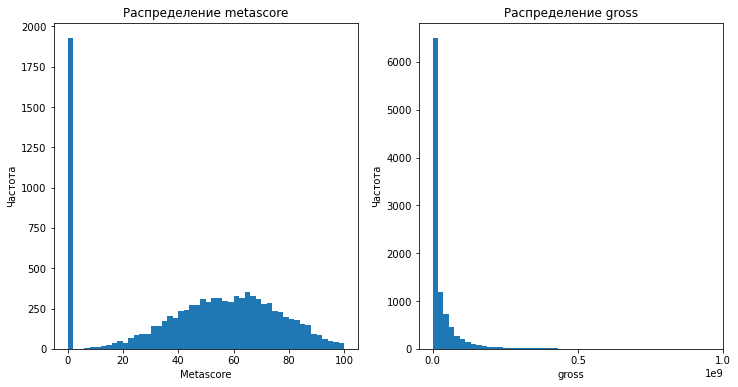

In [58]:
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_imdb['metascore'], bins=50)
plt.title('Распределение metascore')
plt.ylabel('Частота')
plt.xlabel('Metascore')

plt.subplot(1, 2, 2)
plt.hist(df_imdb['gross'], bins=50)
plt.title('Распределение gross')
plt.ylabel('Частота')
plt.xlabel('gross')
plt.xticks([0, 500000000, 1000000000]);

Среди числовых значений у нас есть много 0

In [59]:
df_imdb['gross'].value_counts()

0           2763
4360000        8
8720000        7
25000000       6
10000000       6
            ... 
12712093       1
54544638       1
93051          1
6540000        1
24468550       1
Name: gross, Length: 7131, dtype: int64

In [60]:
df_imdb['metascore'].value_counts()

0     1926
65     180
61     180
66     179
64     174
      ... 
10       2
1        1
6        1
5        1
8        1
Name: metascore, Length: 98, dtype: int64

Посмотрим на эти фильмы

In [61]:
df_imdb[df_imdb['gross'] == 0]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
238,The Kashmir Files,2022,170,8.7,569272,0,0,0,Drama,,
251,Не смотрите наверх,2021,138,7.2,559396,9,49,0,Comedy,Drama,Sci-Fi
326,Эта замечательная жизнь,1946,130,8.6,472836,3,89,0,Drama,Family,Fantasy
410,Лига справедливости Зака Снайдера,2021,242,8.0,413798,9,54,0,Action,Adventure,Fantasy
446,Достать ножи: Стеклянная луковица,2022,139,7.1,395306,5,81,0,Comedy,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...
9986,Рикер,2005,90,5.1,10622,7,0,0,Horror,Mystery,Thriller
9989,Кровоточащая сталь,2017,109,5.1,10617,8,43,0,Action,Sci-Fi,Thriller
9991,Смелость сказать правду,2015,86,6.7,10612,0,43,0,Comedy,Drama,
9993,Незнакомец,2015,102,6.6,10610,0,0,0,Action,Adventure,Crime


In [62]:
df_imdb[df_imdb['metascore'] == 0]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
238,The Kashmir Files,2022,170,8.7,569272,0,0,0,Drama,,
646,Доказательство смерти,2007,127,7.0,301345,9,0,0,Action,Thriller,
659,Хатико: самый верный друг,2009,93,8.1,295518,1,0,0,Biography,Drama,Family
949,Великий диктатор,1940,125,8.4,229045,1,0,288475,Comedy,Drama,War
1015,Планета страха,2007,105,7.1,217025,9,0,0,Action,Comedy,Horror
...,...,...,...,...,...,...,...,...,...,...,...
9988,Emmanuelle,1974,94,5.2,10618,0,0,8720000,Drama,Romance,
9992,Астерикс и тайное зелье,2018,87,6.7,10610,2,0,1271953,Animation,Adventure,Comedy
9993,Незнакомец,2015,102,6.6,10610,0,0,0,Action,Adventure,Crime
9994,Тайна Мунакра,2008,103,6.0,10606,3,0,0,Adventure,Family,Fantasy


У всех этих фильмов есть IMDb rating и определенное количество голосов. Они не выглядят, как провальные проекты без сборов и без отзывов критиков.

Будем считать, что 0 в этих колонках равен NaN, поэтому заменим нули на медианное значение по столбцам.

Почему на медиану? Потому что медиана не будет 'выделяться' на фоне остальных значений. Она будет примерно равна 'нейтральному' значению, которое имеет большинство. 

Почему не используем среднее? Среднее менее устойчиво к выбросам, а для нас это крайне плохо, особенно в случае с gross, где встречаются выбросы.

In [63]:
median_gross = df_imdb['gross'].median()
median_metascore = df_imdb['metascore'].median()

In [64]:
df_imdb.replace({'gross': {0 : median_gross}, 'metascore': {0 : median_metascore}}, inplace=True)

In [65]:
df_imdb['metascore'].value_counts()

52    2073
61     180
65     180
66     179
64     174
      ... 
10       2
1        1
6        1
5        1
8        1
Name: metascore, Length: 97, dtype: int64

In [66]:
df_imdb['gross'].value_counts()

4859475     2764
4360000        8
8720000        7
25000000       6
10000000       6
            ... 
12712093       1
54544638       1
93051          1
6540000        1
24468550       1
Name: gross, Length: 7130, dtype: int64

Теперь самый частый вариант для gross - 4859475 , а для metascore - 52

**Проанализуем колонку 'imdb_rating'**

In [67]:
df_imdb['imdb_rating'].dtypes

dtype('float64')

In [68]:
imdb = df_imdb['imdb_rating'].unique()
imdb.sort()
imdb

array([1. , 1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,
       7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
       8.9, 9. , 9.1, 9.2, 9.3])

- Минимимальный рейтинг imdb - 1
- Максимальный рейтинг imdb - 9.3

Посмотрим на график

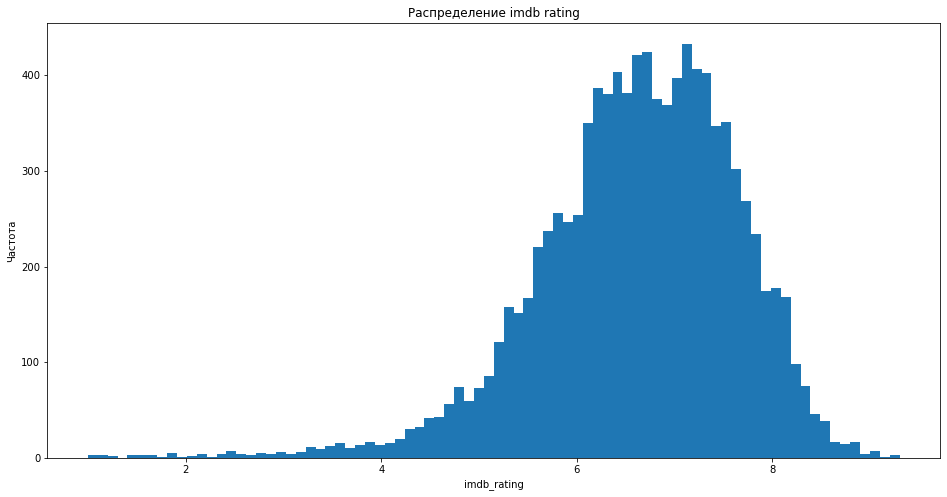

In [69]:
plt.figure(figsize=(16,8))
plt.hist(df_imdb['imdb_rating'], bins=82)
plt.title('Распределение imdb rating')
plt.ylabel('Частота')
plt.xlabel('imdb_rating');

Большинство фильмов имеют imdb_rating в диапозоне между 6 и 7.5

Фильмов с оценкой до 4 мало, но они есть и сдвигают распределение вправо

### Посмотрим на 2 датасет

In [70]:
df_KP = pd.read_csv('df_KP_no_dup.csv', sep=',')
df_KP

,title,year,country,director,actor_1,actor_2,ratingKP
0,1+1,2011,Франция,Оливье Накаш,Франсуа Клюзе,Омар Си,8.805
1,Джентльмены,2019,Великобритания,Гай Ричи,Мэттью МакКонахи,Чарли Ханнэм,8.547
2,Волк с Уолл-стрит,2013,США,Мартин Скорсезе,Леонардо ДиКаприо,Джона Хилл,7.971
3,Гнев человеческий,2021,Великобритания,Гай Ричи,Джейсон Стэйтем,Холт Маккэллани,7.588
4,Брат,1997,Россия,Алексей Балабанов,Сергей Бодров мл.,Виктор Сухоруков,8.294
...,...,...,...,...,...,...,...
9877,Детство лидера,2015,Великобритания,Брэйди Корбет,Беренис Бежо,Лиам Каннингэм,5.805
9878,Хороший сосед,2016,США,Касра Фарахани,Джеймс Каан,Логан Миллер,6.141
9879,В петле,2009,Великобритания,Армандо Ианнуччи,Питер Капальди,Том Холландер,6.932
9880,День драфта,2014,США,Айвен Райтман,Кевин Костнер,Дженнифер Гарнер,6.828


__Описание колонок:__

- `title` — название фильма
- `year` — дата релиза
- `country` — страна создания фильма
- `director`  — режиссер фильма
- `actor_1` — актер 1 в фильме
- `actor_2` — актер 2 в фильме
- `ratingKP` — рейтинг фильма от сайта 'КиноПоиск'

Посмотрим на информацию о датасете

In [71]:
df_KP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     9879 non-null   object 
 1   year      9882 non-null   int64  
 2   country   9882 non-null   object 
 3   director  9882 non-null   object 
 4   actor_1   9882 non-null   object 
 5   actor_2   9882 non-null   object 
 6   ratingKP  9882 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 540.5+ KB


Видим, что у нас в колонке 'title' есть 3 пропуска

Попробуем их найти

In [72]:
df_KP[df_KP.isnull().any(axis=1)].index

Int64Index([931, 6962, 9762], dtype='int64')

In [73]:
df_KP.iloc[[931, 6962, 9762]]

,title,year,country,director,actor_1,actor_2,ratingKP
931,NaN,2019,Россия,Марюс Вайсберг,Юлия Александрова,Егор Крид,4.787
6962,NaN,2021,Италия,Паоло Костелла,Амбра Анджолини,Лука Бидзарри,6.339
9762,NaN,2018,Греция,Акис Полизос,Фанис Муратидис,Димитрис Кицос,6.719


Пропуски содержатся в названиях трех фильмах, предлагаем их удалить

In [74]:
df_KP = df_KP.drop([931, 6962, 9762])

Проверим еще раз на пропуски

In [75]:
df_KP.isna().sum()

title       0
year        0
country     0
director    0
actor_1     0
actor_2     0
ratingKP    0
dtype: int64

Пропусков нет

**Посмотрим на страны производства фильмов**

In [76]:
df_KP['country'].unique()

array(['Франция', 'Великобритания', 'США', 'Россия', 'СССР', 'Новая',
       'Германия', 'Япония', 'Корея', 'Австралия', 'Канада', 'Швеция',
       'ЮАР', 'Италия', 'Испания', 'Китай', 'Бразилия', 'Индонезия',
       'Ливан', 'Дания', 'Аргентина', 'Ирландия', 'Гонконг', 'Польша',
       'Норвегия', 'Чехия', 'Индия', 'Мексика', 'Болгария', 'Исландия',
       'Бельгия', 'Украина', 'Тайвань', 'Чехословакия', 'Казахстан',
       'Финляндия', 'ОАЭ', 'Эстония', 'Таиланд', 'Швейцария', 'Сербия',
       'Австрия', 'Беларусь', 'Венгрия', 'Нидерланды', 'Румыния',
       'Греция', 'Чили', 'Литва', 'Иран', 'Югославия', 'Грузия', 'Кения',
       'Турция', 'Словакия', 'Аруба', 'Остров', 'Колумбия', 'Израиль',
       'Латвия', 'Португалия', 'Венесуэла', 'Армения', 'Словения',
       'Косово', 'Босния', 'Марокко'], dtype=object)

In [77]:
df_KP['country'].value_counts().nlargest(10)

США               4676
Россия            1244
Великобритания     884
Франция            681
СССР               529
Германия           241
Канада             232
Италия             159
Испания            132
Корея              121
Name: country, dtype: int64

In [78]:
df_KP['country'].value_counts().nsmallest(10)

Латвия        1
Босния        1
Косово        1
Словения      1
Армения       1
Венесуэла     1
Португалия    1
Колумбия      1
Ливан         1
Остров        1
Name: country, dtype: int64

Посмотрим на график

In [79]:
coun = pd.DataFrame(df_KP['country'].value_counts()).reset_index()
coun.columns = ['country', 'number']
coun

,country,number
0,США,4676
1,Россия,1244
2,Великобритания,884
3,Франция,681
4,СССР,529
...,...,...
62,Словакия,1
63,Болгария,1
64,Кения,1
65,ОАЭ,1


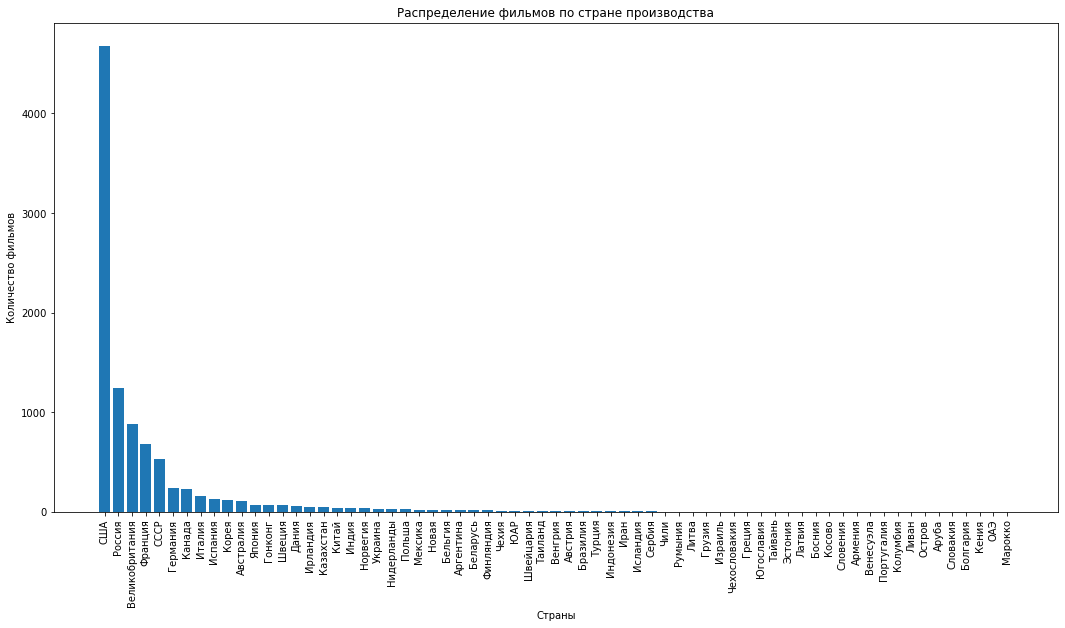

In [80]:
plt.figure(figsize=(18, 9))
plt.bar(coun['country'], coun['number'])
plt.xlabel('Страны')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по стране производства')
plt.xticks(rotation=90);

Видим, что большинство фильмов произведены в США, Росии, Великобритании, Франции, СССР

Есть страны, фильмы которых представлены в очень маленьком количестве в нашем датасете

**Посмотрим на информацию о режиссерах и актерах**

In [81]:
df_KP['director'].unique().shape[0]

4506

In [82]:
df_KP['actor_1'].unique().shape[0]

4255

In [83]:
df_KP['actor_2'].unique().shape[0]

5513

In [84]:
df_KP['director'].value_counts().nlargest(10)

Вуди Аллен          35
Стивен Спилберг     30
Ридли Скотт         26
Стивен Содерберг    23
Клинт Иствуд        22
Мартин Скорсезе     21
Рон Ховард          21
Альфред Хичкок      20
Эльдар Рязанов      19
Сарик Андреасян     18
Name: director, dtype: int64

In [85]:
df_KP['actor_1'].value_counts().nlargest(10)

Николас Кейдж         57
Джеки Чан             50
Роберт Де Ниро        41
Брюс Уиллис           39
Джонни Депп           38
Сильвестр Сталлоне    36
Адам Сэндлер          34
Том Круз              32
Дензел Вашингтон      32
Мэл Гибсон            32
Name: actor_1, dtype: int64

In [86]:
df_KP['actor_2'].value_counts().nlargest(10)

...                  44
Сэмюэл Л. Джексон    20
Николь Кидман        18
Морган Фриман        18
Роберт Де Ниро       18
Джуд Лоу             17
Колин Фёрт           16
Жан Рено             15
Джулианна Мур        15
Пенелопа Крус        15
Name: actor_2, dtype: int64

Видим в этих столбах буйное разнообразие актеров и режиссеров

Также заметим странное значение '...' в столбце 'actor_2'

In [87]:
df_KP[df_KP['actor_2'] == '...'].head()

,title,year,country,director,actor_1,actor_2,ratingKP
2927,Айка,2018,Россия,Сергей Дворцевой,Самал Еслямова,...,7.027
2957,Земляне,2005,США,Шон Монсон,Хоакин Феникс,...,8.746
4045,История одного назначения,2018,Россия,Авдотья Смирнова,Алексей Смирнов,...,7.039
4473,Звёздный разум,2022,Россия,Егор Корешков,Алёна Константинова,...,4.654
5089,Свадебная ваза,1974,Бельгия,Тьерри Зено,Доминик Гарни,...,3.003


Оставим эти три точки, будем считать, что актер 2 неизвестен

**Теперь обратим внимание на рейтинг Кинопоиска**

In [88]:
df_KP['ratingKP'].dtypes

dtype('float64')

In [89]:
KP = df_KP['ratingKP'].unique()
KP.sort()
KP

array([1.108, 1.112, 1.19 , ..., 9.073, 9.108, 9.412])

- Минимальный рейтинг - 1.108
- Максимальный рейтинг - 9.412

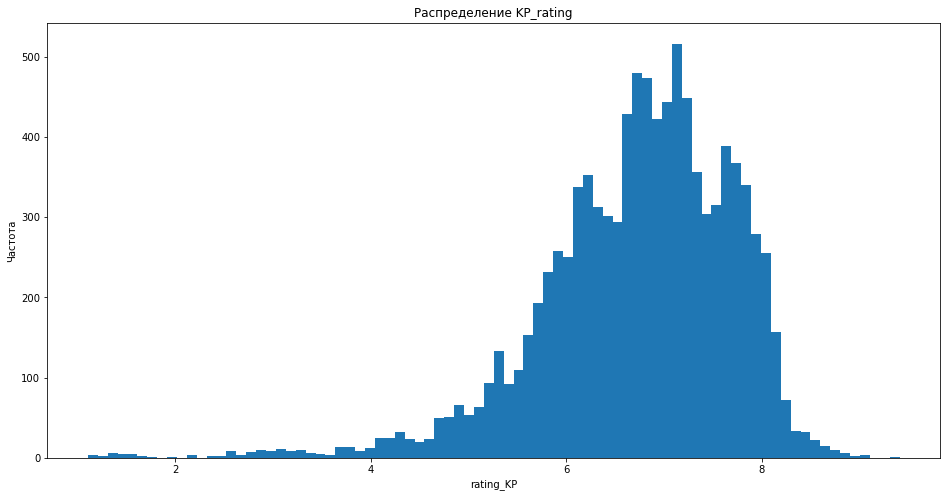

In [90]:
plt.figure(figsize=(16,8))
plt.hist(df_KP['ratingKP'], bins=82)
plt.title('Распределение KP_rating')
plt.ylabel('Частота')
plt.xlabel('rating_KP');

Видим ситуацию, схожею с IMDb рейтингом:

Большинство фильмов имеют рейтинг КиноПоиска в диапозоне между 6.5 и 8

Фильмов с оценкой до 5 мало, но они есть и сдвигают распределение вправо

Наблюдаются выбросы с оценками, близкими к 1

### Попробуем объединить оба датасета

Для этого, во-первых, приведем названия фильмов с нижнему регистру, удалим пунктуацию и пропуски

In [91]:
df_KP['title'] = df_KP['title'].str.lower()
df_KP['title'] = df_KP['title'].str.replace('[{}]'.format(string.punctuation), '')
df_KP['title'] = df_KP['title'].str.replace(' ', '')

In [92]:
df_KP

,title,year,country,director,actor_1,actor_2,ratingKP
0,11,2011,Франция,Оливье Накаш,Франсуа Клюзе,Омар Си,8.805
1,джентльмены,2019,Великобритания,Гай Ричи,Мэттью МакКонахи,Чарли Ханнэм,8.547
2,волксуоллстрит,2013,США,Мартин Скорсезе,Леонардо ДиКаприо,Джона Хилл,7.971
3,гневчеловеческий,2021,Великобритания,Гай Ричи,Джейсон Стэйтем,Холт Маккэллани,7.588
4,брат,1997,Россия,Алексей Балабанов,Сергей Бодров мл.,Виктор Сухоруков,8.294
...,...,...,...,...,...,...,...
9877,детстволидера,2015,Великобритания,Брэйди Корбет,Беренис Бежо,Лиам Каннингэм,5.805
9878,хорошийсосед,2016,США,Касра Фарахани,Джеймс Каан,Логан Миллер,6.141
9879,впетле,2009,Великобритания,Армандо Ианнуччи,Питер Капальди,Том Холландер,6.932
9880,деньдрафта,2014,США,Айвен Райтман,Кевин Костнер,Дженнифер Гарнер,6.828


Мы будем объединять два датасета по названиям фильмов и дате релиза. Однако могут встретиться фильмы, которые имеют одинаковые название и год. Найдем и удалим такие фильмы во избежание путанницы 

In [93]:
duplicates = df_KP.loc[df_KP.duplicated(subset=['title', 'year']), :]
dup = list(duplicates['title'])
dup[:10]

['защитник', 'второйшанс', 'остатьсявживых', 'любовьимонстры']

In [94]:
len(dup)

4

In [95]:
df_KP[df_KP['title'] == 'любовьимонстры']

,title,year,country,director,actor_1,actor_2,ratingKP
1009,любовьимонстры,2020,Канада,Майкл Мэтьюз,Дилан О’Брайен,Хиро,6.729
9658,любовьимонстры,2020,Россия,Екатерина Краснер,Роман Курцын,Лорина Камбурова,4.354


In [96]:
df_KP_filtered = df_KP[~df_KP['title'].isin(dup)]

In [97]:
df_KP_filtered

,title,year,country,director,actor_1,actor_2,ratingKP
0,11,2011,Франция,Оливье Накаш,Франсуа Клюзе,Омар Си,8.805
1,джентльмены,2019,Великобритания,Гай Ричи,Мэттью МакКонахи,Чарли Ханнэм,8.547
2,волксуоллстрит,2013,США,Мартин Скорсезе,Леонардо ДиКаприо,Джона Хилл,7.971
3,гневчеловеческий,2021,Великобритания,Гай Ричи,Джейсон Стэйтем,Холт Маккэллани,7.588
4,брат,1997,Россия,Алексей Балабанов,Сергей Бодров мл.,Виктор Сухоруков,8.294
...,...,...,...,...,...,...,...
9877,детстволидера,2015,Великобритания,Брэйди Корбет,Беренис Бежо,Лиам Каннингэм,5.805
9878,хорошийсосед,2016,США,Касра Фарахани,Джеймс Каан,Логан Миллер,6.141
9879,впетле,2009,Великобритания,Армандо Ианнуччи,Питер Капальди,Том Холландер,6.932
9880,деньдрафта,2014,США,Айвен Райтман,Кевин Костнер,Дженнифер Гарнер,6.828


Повторим те же самые действия для датасета с IMDb

In [98]:
df_imdb['title'] = df_imdb['title'].str.lower()
df_imdb['title'] = df_imdb['title'].str.replace('[{}]'.format(string.punctuation), '')
df_imdb['title'] = df_imdb['title'].str.replace(' ', '')

In [99]:
df_imdb

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,
1,тёмныйрыцарь,2008,152,9.0,2723913,6,84,534858444,Action,Crime,Drama
2,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi
3,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,
4,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,
...,...,...,...,...,...,...,...,...,...,...,...
9992,астерикситайноезелье,2018,87,6.7,10610,2,52,1271953,Animation,Adventure,Comedy
9993,незнакомец,2015,102,6.6,10610,0,52,4859475,Action,Adventure,Crime
9994,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy
9995,открытыесердца,2002,113,7.5,10606,7,77,122308,Drama,Romance,


In [100]:
duplicates = df_imdb.loc[df_imdb.duplicated(subset=['title', 'year']), :]
dup = list(duplicates['title'])
dup[:10]

['девять',
 'зверь',
 'перваядочь',
 'остатьсявживых',
 'убийца',
 'дылда',
 'гордость',
 'мама',
 'ангел']

In [101]:
len(dup)

9

In [102]:
df_imdb_filtered = df_imdb[~df_imdb['title'].isin(dup)]

In [103]:
df_imdb_filtered

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,
1,тёмныйрыцарь,2008,152,9.0,2723913,6,84,534858444,Action,Crime,Drama
2,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi
3,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,
4,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,
...,...,...,...,...,...,...,...,...,...,...,...
9992,астерикситайноезелье,2018,87,6.7,10610,2,52,1271953,Animation,Adventure,Comedy
9993,незнакомец,2015,102,6.6,10610,0,52,4859475,Action,Adventure,Crime
9994,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy
9995,открытыесердца,2002,113,7.5,10606,7,77,122308,Drama,Romance,


### Объединим два датасета:

In [104]:
df = pd.merge(df_imdb_filtered, df_KP_filtered, on=['title', 'year'])
df

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,director,actor_1,actor_2,ratingKP
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,,США,Фрэнк Дарабонт,Тим Роббинс,Морган Фриман,9.108
1,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,США,Кристофер Нолан,Леонардо ДиКаприо,Джозеф Гордон-Левитт,8.662
2,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,,США,Дэвид Финчер,Эдвард Нортон,Брэд Питт,8.658
3,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,США,Роберт Земекис,Том Хэнкс,Робин Райт,8.918
4,криминальноечтиво,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,США,Квентин Тарантино,Джон Траволта,Сэмюэл Л. Джексон,8.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,сушиgirl,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,Romance,США,Робер Аллан Акерман,Бриттани Мерфи,Тосиюки Нисида,6.729
4412,рикер,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,Thriller,США,Дэйв Пэйн,Девон Гаммерсолл,Дерек Ричардсон,5.240
4413,несущаясмерть,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,Horror,Канада,Джереми Хафт,Дженна Дуан,Кэти Стюарт,5.306
4414,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy,Венгрия,Габор Чупо,Дакота Блю Ричардс,Джульет Стивенсон,6.466


In [105]:
df.isna().sum()

title          0
year           0
runtime        0
imdb_rating    0
votes          0
certificate    0
metascore      0
gross          0
genre_1        0
genre_2        0
genre_3        0
country        0
director       0
actor_1        0
actor_2        0
ratingKP       0
dtype: int64

In [106]:
df.dtypes

title           object
year             int64
runtime          int64
imdb_rating    float64
votes            int64
certificate      int64
metascore        int64
gross            int64
genre_1         object
genre_2         object
genre_3         object
country         object
director        object
actor_1         object
actor_2         object
ratingKP       float64
dtype: object

## Шаг 4: Визуализация

Построим первый график, по которому можно сориентироваться 

По диагонали — маргинальное распределение каждой числовой переменной с учётом целевой переменной. В остальных ячейках — scatter plot каждой пары числовых переменных с учётом целевой переменной.

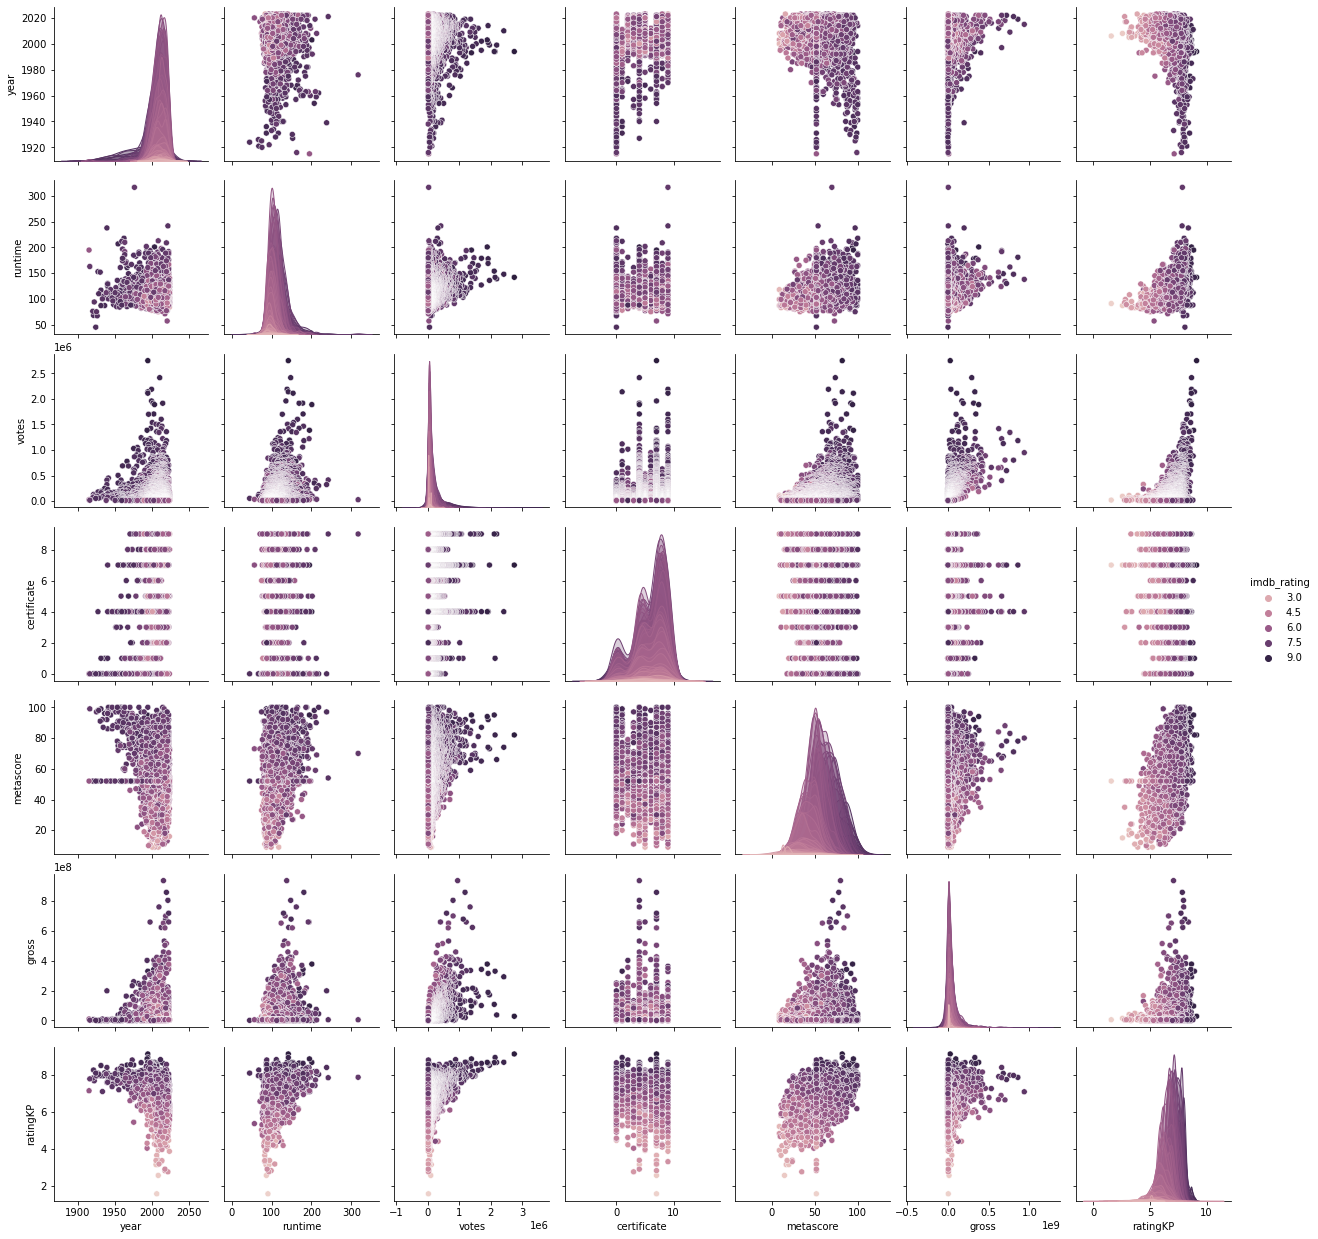

In [107]:
sns.pairplot(df, hue="imdb_rating");

Также выведем матрицу корреляций

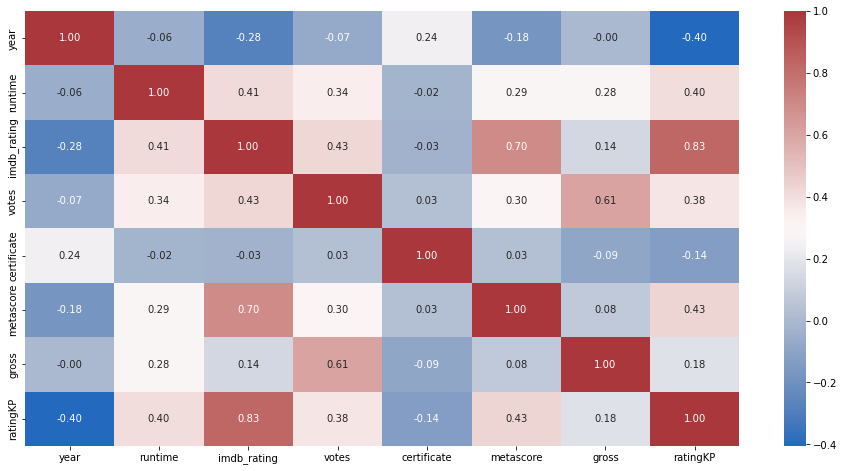

In [108]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f");

Исходя из полученных графиков, заметим следующие интересные зависимости:

- между imdb_rating и KP_rating (довольно очевидно, что между ними должна быть связь, на это как раз показывает корреляция)
- между certificate и imdb_rating/KP_rating (получаются интересные scatter plots)
- между metascore и imdb_rating/KP_rating (высокий коэффициент корреляции и наблюдается зависимость по scatter plots)

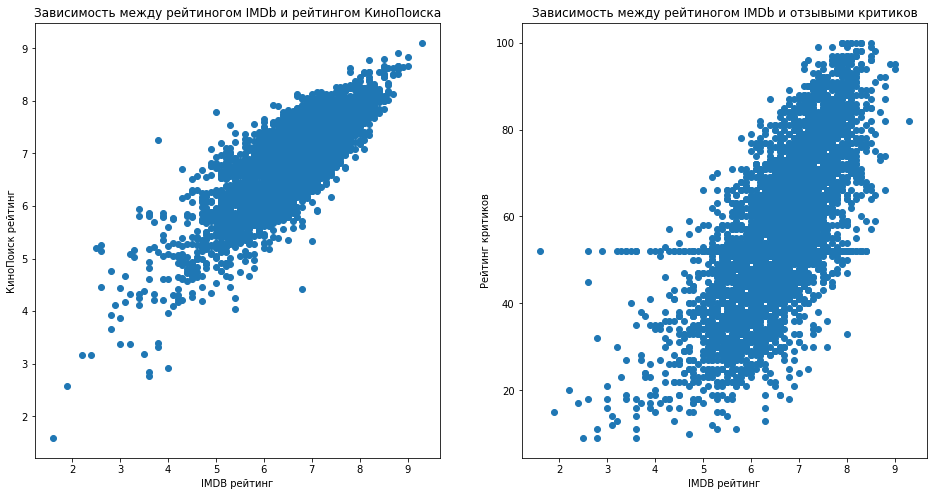

In [109]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(df['imdb_rating'], df['ratingKP'])
plt.title('Зависимость между рейтиногом IMDb и рейтингом КиноПоиска')
plt.ylabel('КиноПоиск рейтинг')
plt.xlabel('IMDB рейтинг')


plt.subplot(1, 2, 2)
plt.scatter(df['imdb_rating'], df['metascore'])
plt.title('Зависимость между рейтиногом IMDb и отзывыми критиков')
plt.ylabel('Рейтинг критиков')
plt.xlabel('IMDB рейтинг');

Между этими величинами действительно наблюдается сильная положительная зависимость, что очевидно по смыслу:
чем выше один рейтинг, тем выше и другой

1) Посмотрим, есть ли зависимость между рейтингом IMDb и возрастными ограничениями

<Figure size 1152x432 with 0 Axes>

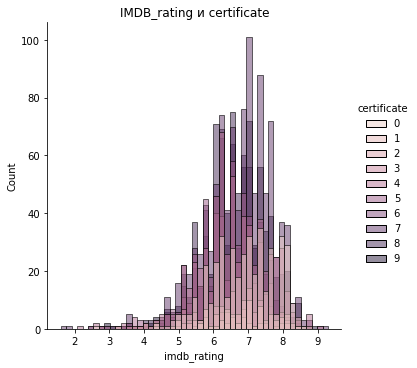

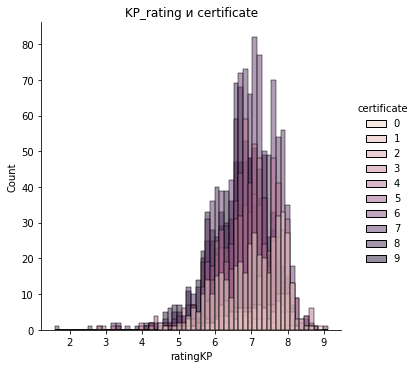

In [110]:
plt.figure(figsize=(16,6));\
sns.displot(df, x="imdb_rating", hue="certificate")
plt.title('IMDB_rating и certificate')

sns.displot(df, x="ratingKP", hue="certificate")
plt.title('KP_rating и certificate');

Судя по графикам, появляется предположение, что у фильмов с более высоким возрастным ограничением рейтинги IMDb и Кинопоска выше (по графикам видим, что большинство фильмов с возрастными ограничениями больше 6 находятся на правой стороне распределения)

Запомним данное предположение и проверим его в качестве гипотизы в следующих пунктах

2) Многие критикуют фильмы производства России и превозносят кинемотограф США

Попробуем понять, правда ли это с помощью визуализации

__Попробуем посмотреть на средний рейтинг IMDb фильмов по странам производства__

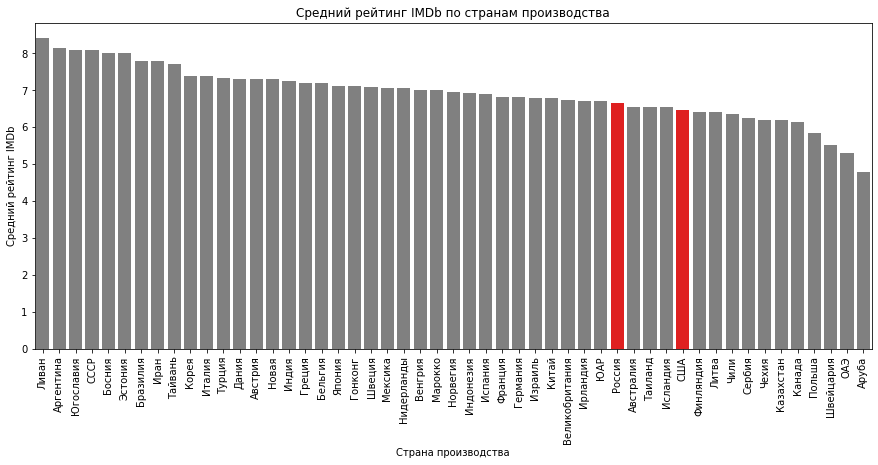

In [111]:
mean_ratings = df.groupby('country')['imdb_rating'].mean().reset_index()
mean_ratings = mean_ratings.sort_values('imdb_rating', ascending=False)

plt.figure(figsize=(15, 6))
colors = ['red' if country in ['Россия', 'США'] else 'gray' for country in mean_ratings['country']]
sns.barplot(data=mean_ratings, x='country', y='imdb_rating', palette=colors)
plt.xlabel('Страна производства')
plt.ylabel('Средний рейтинг IMDb')
plt.title('Средний рейтинг IMDb по странам производства')
plt.xticks(rotation=90)
plt.show()

Очень интересно... Получается, все наоборот: фильмы, произведенные в России, имеют средний рейтинг IMDb выше, чем фильмы США. 

Возможно проблема в том, что в нашем датасете фильмов США примерно в 3-4 раза больше, чем фильмов России (мы знаем об этом из графика "Распределение фильмов по стране производства" из предыдущего шага), а может фильмы России и правда качественнее.

Снова запоним этот интересный вывод и проверим его на шаге проверки гипотез

3) А зависит ли рейтинг фильма от его длительности? Мы помним, что у нас в датасете встречаются фильмы с очень 'нестандартной' длительностью

Попробуем это выяснить

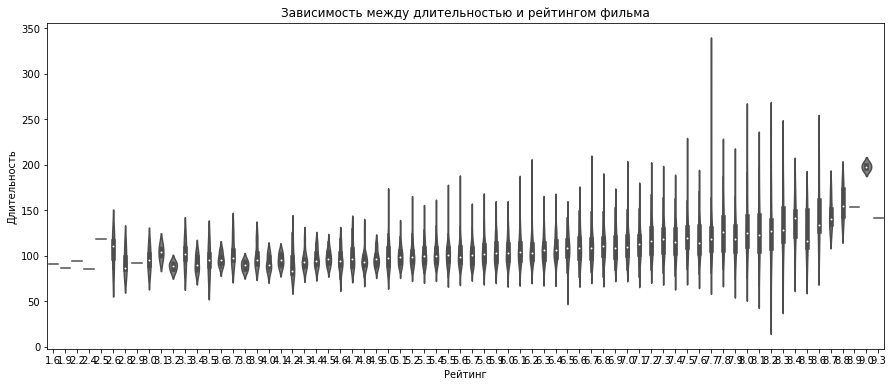

In [112]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='imdb_rating', y='runtime', color='gray')
plt.xlabel('Рейтинг')
plt.ylabel('Длительность')
plt.title('Зависимость между длительностью и рейтингом фильма')
plt.show()

На данном графике можем заметить, что центральная полоса каждой 'скрипки', показывающая медиану длительности фильмов для соответствующего значения рейтинга, немного увеличивается с увеличением рейтинга IMDb.

Можно ли считать, что сущетсвует зависимость: чем длиннее фильм, тем выше у него рейтинг? Проверим это на шаге проверки гипотез

4) А раньше было лучше... Можно ли считать, что фильмы, снятые много лет назад, лучше чем современные фильмы?

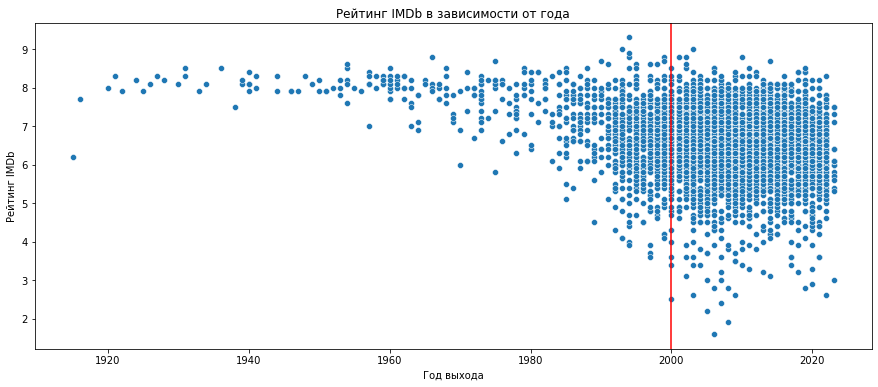

In [113]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='year', y="imdb_rating")
plt.xlabel('Год выхода')
plt.ylabel('Рейтинг IMDb')
plt.title('Рейтинг IMDb в зависимости от года')

plt.axvline(x=2000, color='red', linestyle='-')

plt.show()

Кажется раньше и правда было лучше)) 

Опираясь на график, предположим, что средний рейтинг IMDb фильмов, снятых до 2000 годов, выше чем рейтинг IMDb современных фильмов (после 2000). Точно проверим данную гипотезу в следующих шагах

5) Теперь поговорим о сборах фильмов 

Будем строить графики для определения зависимости между жанром фильма и его сборами (так как колонки с жанрами 3, будем строить 3 графика)

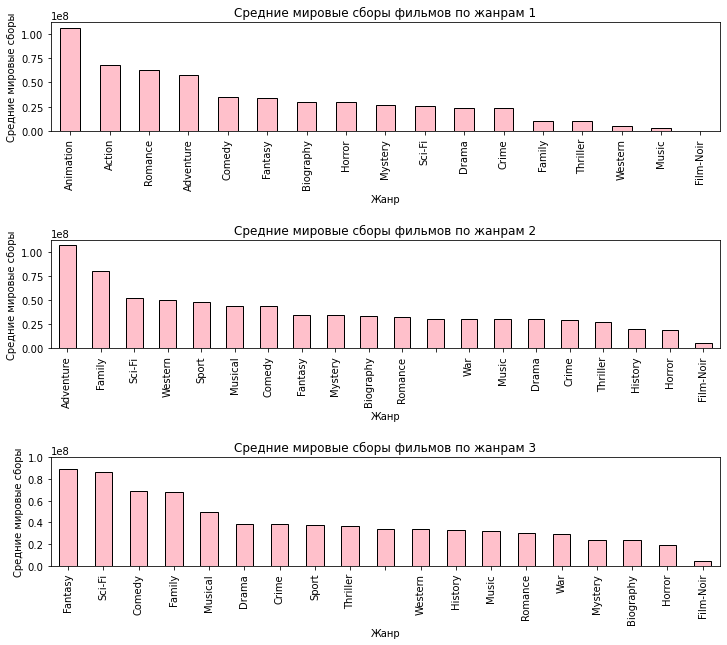

In [114]:
mean_gross_by_genre_1 = df.groupby('genre_1')['gross'].mean().sort_values(ascending=False)
mean_gross_by_genre_2 = df.groupby('genre_2')['gross'].mean().sort_values(ascending=False)
mean_gross_by_genre_3 = df.groupby('genre_3')['gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=1)

plt.subplot(3, 1, 1)
mean_gross_by_genre_1.plot(kind='bar', color='pink', edgecolor='black')
plt.xlabel('Жанр')
plt.ylabel('Средние мировые сборы')
plt.title('Средние мировые сборы фильмов по жанрам 1')

plt.subplot(3, 1, 2)
mean_gross_by_genre_2.plot(kind='bar', color='pink', edgecolor='black')
plt.xlabel('Жанр')
plt.ylabel('Средние мировые сборы')
plt.title('Средние мировые сборы фильмов по жанрам 2')

plt.subplot(3, 1, 3)
mean_gross_by_genre_3.plot(kind='bar', color='pink', edgecolor='black')
plt.xlabel('Жанр')
plt.ylabel('Средние мировые сборы')
plt.title('Средние мировые сборы фильмов по жанрам 3')
plt.gca().set_ylim([0, 1e8]);

Исходя из графика можем сделать следующие предположения: 

- самый неприбыльный жанр для производства: Film-Noir
- самый прибыльные жанры: Animation, Action, Adventure, Family, Sci-Fi и Fantasy (для 3 разных колонок жанров)

Теперь интересно изучить, есть ли фильмы, имеющие комбинацию самых прибыльных жанров. Для этого построим еще один график:

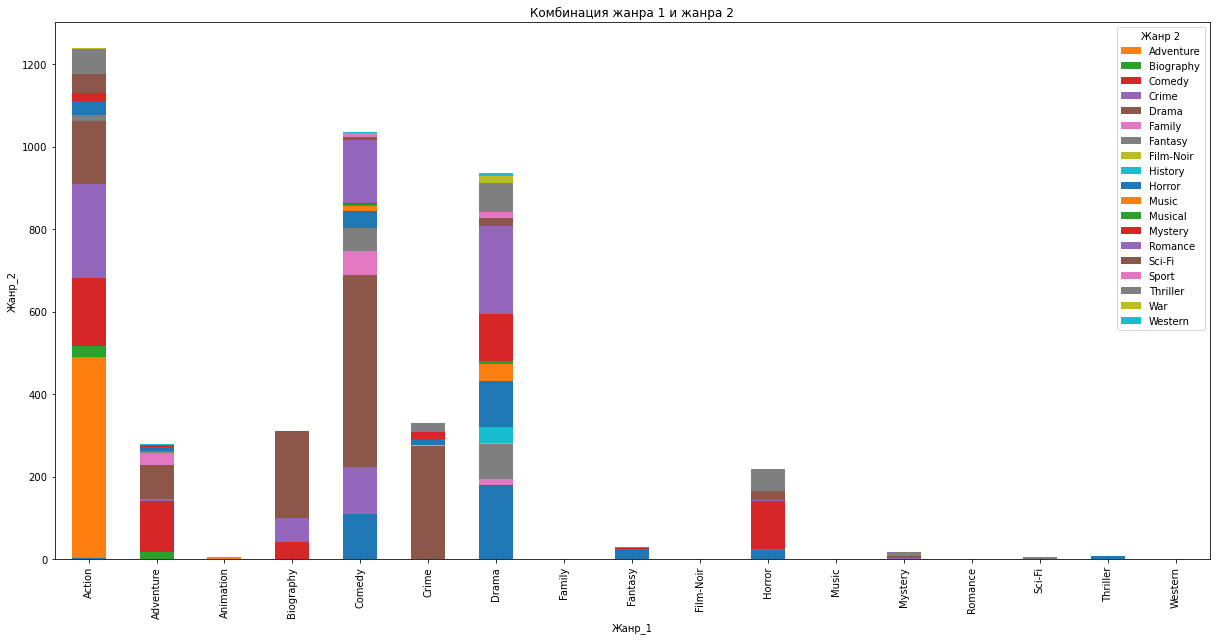

In [115]:
genres_counts = df.groupby(['genre_1', 'genre_2']).size().unstack()

genres_counts.plot(kind='bar', stacked=True, figsize=(17, 9))
plt.xlabel('Жанр_1')
plt.ylabel('Жанр_2')
plt.title('Комбинация жанра 1 и жанра 2')

plt.legend(title='Жанр 2')

plt.tight_layout()
plt.show()

Исходя из графика можем сделать следующее предположение: 

самая прибыльная комбинация жанров для фильмов: Action-Adventure (такая комбинация сущетсвует, более того, по графику видно, что фильмы жанра Action очень часто идут в комбинации с жанром Adventure)

## Шаг 5:  Создание новых признаков

__1. Для начала добавим маркер о том, вышел ли фильм в период пандемии Короновируса__

Как мы знаем, пандемия Короновируса серьезно повлияла на киноиндустрию: кинотератры закрылись, фильмы собирали маленькие сборы, выход многих фильмов был отложен. Поэтому данный признак может оказаться полезным для определения рейтинга фильма

В данный момент мы выдвигаем гипотезу: фильмы, выпущенные в период Коронавируса имеют более низкие рейтинги IMDb и Кинопоиск, чем фильмы, выпущенные в другие года. Проверим эту гипотезу в следующем пункте

In [116]:
start_year = 2019
end_year = 2022

df['Is_Covid_Period'] = 0

df.loc[(df['year'] >= start_year) & (df['year'] <= end_year), 'Is_Covid_Period'] = 1

In [117]:
df[df['Is_Covid_Period'] == 1]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,director,actor_1,actor_2,ratingKP,Is_Covid_Period
20,джокер,2019,122,8.4,1358733,9,59,335451311,Crime,Drama,Thriller,США,Тодд Филлипс,Хоакин Феникс,Роберт Де Ниро,7.978,1
28,мстителифинал,2019,181,8.4,1183942,7,78,858373000,Action,Adventure,Drama,США,Энтони Руссо,Роберт Дауни мл.,Крис Эванс,7.848,1
67,паразиты,2019,132,8.5,858077,9,96,53367844,Drama,Thriller,,Корея,Пон Джун-хо,Сон Кан-хо,Ли Сон-гюн,8.020,1
80,человекпаукнетпутидомой,2021,148,8.2,801499,4,71,804747988,Action,Adventure,Fantasy,США,Джон Уоттс,Том Холланд,Зендея,7.952,1
97,достатьножи,2019,130,7.9,728936,7,82,165359751,Comedy,Crime,Drama,США,Райан Джонсон,Дэниэл Крэйг,Ана де Армас,8.086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,2067петлявремени,2020,114,4.9,10757,0,39,4859475,Mystery,Sci-Fi,,Австралия,Сет Ларни,Коди Смит-Макфи,Аарон Гленнэйн,5.834,1
4400,дикаяпарочка,2020,102,5.7,10753,5,42,4859475,Comedy,Drama,Romance,США,Джон Патрик Шэнли,Эмили Блант,Джейми Дорнан,6.387,1
4402,оленьякожа,2019,77,6.6,10702,9,68,4859475,Comedy,Horror,,Франция,Квентин Дюпьё,Жан Дюжарден,Адель Энель,6.729,1
4405,линиягоризонта,2020,92,4.8,10682,5,52,4859475,Action,Adventure,Drama,Швеция,Микаэль Марсимаин,Эллисон Уильямс,Александр Дреймон,5.481,1


__2. Заменим имена актеров на их место в рейтинге Топ-1000 актеров с сайта IMDb__

Мы владеем информацией о двух актерах для каждого фильма. На наш взгляд, эта информация может значительно влиять на IMDb рейтинг и рейтинг КиноПоиска. Однако мы не можем никак использовать эти данные для построени модели машинного обучения, так как эти признаки категориальные и не подлежат кодированию из-за слишком большого количества уникальных имен.

Поэтому специально для данного пункта мы написали отдельный парсер (находится в файле "Parsing"), при помощи которого получили информацию с сайта https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=1 (топ-1000 лучших актеров и актрис по мнению IMDb)

Мы ходим заменить имена всех актеров на их рейтинг в этом датафрейме. На наш взгляд этот новый признак может быть очень информативным.

Однако в связи с этой идеей у нас есть проблема: имена звезд в списке топ-1000 даны на английском языке, а в наших данных - на русском. Для перевода мы использовали онлайн-переводчик https://www.deepl.com/translator (DeepL) -онлайн-переводчик, работающий на основе машинного перевода

In [118]:
df_stars = pd.read_csv('stars_rus.csv', sep=',')
df_stars

,rating,name
0,1,Роберт Де Ниро
1,2,Джек Николсон
2,3,Марлон Брандо
3,4,Дензел Вашингтон
4,5,Кэтрин Хепберн
...,...,...
995,996,Адам Драйвер
996,997,Нед Битти
997,998,Джон Клиз
998,999,Джон Туртурро


Заменим имена актеров на номер из рейтинга

Если актера нет в рейтинге, то поставим ему рейтинг 1500, как бы отдаляя его от топ 1000

In [119]:
actors_dict = dict(zip(df_stars['name'], df_stars['rating']))

df['actor_1'] = df['actor_1'].map(actors_dict).fillna(1500)

df['actor_2'] = df['actor_2'].map(actors_dict).fillna(1500)

df

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,director,actor_1,actor_2,ratingKP,Is_Covid_Period
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,,США,Фрэнк Дарабонт,159,34,9.108,0
1,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,США,Кристофер Нолан,16,463,8.662,0
2,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,,США,Дэвид Финчер,1500,120,8.658,0
3,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,США,Роберт Земекис,12,340,8.918,0
4,криминальноечтиво,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,США,Квентин Тарантино,653,86,8.645,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,сушиgirl,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,Romance,США,Робер Аллан Акерман,1500,1500,6.729,0
4412,рикер,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,Thriller,США,Дэйв Пэйн,1500,1500,5.240,0
4413,несущаясмерть,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,Horror,Канада,Джереми Хафт,1500,1500,5.306,0
4414,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy,Венгрия,Габор Чупо,1500,1500,6.466,0


__3. Теперь поработаем с именами режиссеров__

К сожалению, мы не нашли рейтинг режиссеров, содержащий большое количество имен. 

Поэтому мы поступим следующим образом:

Создадим признак director's experience (Опыт режиссера).
Для этого будем использовать информацию из колонки "director" (режиссер) для создания признака, отражающего опыт режиссера: посчитаем количество фильмов, в которых данный режиссер принимал участие из нашего датасета

In [120]:
director_experience = df.groupby('director').size().reset_index(name="director's experience")

df = pd.merge(df, director_experience, on='director', how='left')

df = df.drop('director', axis=1)
df

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,actor_1,actor_2,ratingKP,Is_Covid_Period,director's experience
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,,США,159,34,9.108,0,3
1,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,США,16,463,8.662,0,7
2,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,,США,1500,120,8.658,0,10
3,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,США,12,340,8.918,0,11
4,криминальноечтиво,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,США,653,86,8.645,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,сушиgirl,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,Romance,США,1500,1500,6.729,0,1
4412,рикер,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,Thriller,США,1500,1500,5.240,0,1
4413,несущаясмерть,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,Horror,Канада,1500,1500,5.306,0,1
4414,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy,Венгрия,1500,1500,6.466,0,1


__4. Теперь попробуем покреативить:__

Вдруг успех фильма связан с длиной названия фильма. Чтобы это проверить созданим новый признак: 'title_length'

In [121]:
df['title_length'] = df['title'].str.len()
df

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,actor_1,actor_2,ratingKP,Is_Covid_Period,director's experience,title_length
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,,США,159,34,9.108,0,3,15
1,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,США,16,463,8.662,0,7,6
2,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,,США,1500,120,8.658,0,10,14
3,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,США,12,340,8.918,0,11,11
4,криминальноечтиво,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,США,653,86,8.645,0,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,сушиgirl,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,Romance,США,1500,1500,6.729,0,1,8
4412,рикер,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,Thriller,США,1500,1500,5.240,0,1,5
4413,несущаясмерть,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,Horror,Канада,1500,1500,5.306,0,1,13
4414,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy,Венгрия,1500,1500,6.466,0,1,12


__5. И напоследок создадим бинарный признак 'is_blockbuster', который будет говорить является ли фильм блокбастером__

Мы установим пороговое значение сборов в 100 млн долларов и присвоим значение 1, если сборы фильма равны или превышают это значение, и 0 в противном случае

In [122]:
threshold = 100000000  

df['is_blockbuster'] = df['gross'].apply(lambda x: 1 if x >= threshold else 0)

df

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,actor_1,actor_2,ratingKP,Is_Covid_Period,director's experience,title_length,is_blockbuster
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,,США,159,34,9.108,0,3,15,0
1,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,США,16,463,8.662,0,7,6,1
2,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,,США,1500,120,8.658,0,10,14,0
3,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,США,12,340,8.918,0,11,11,1
4,криминальноечтиво,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,США,653,86,8.645,0,7,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,сушиgirl,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,Romance,США,1500,1500,6.729,0,1,8,0
4412,рикер,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,Thriller,США,1500,1500,5.240,0,1,5,0
4413,несущаясмерть,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,Horror,Канада,1500,1500,5.306,0,1,13,0
4414,тайнамунакра,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy,Венгрия,1500,1500,6.466,0,1,12,0


## Шаг 6:  Проверка гипотез

После шага 4: Визуализация у нас появились следующие гипотезы для проверки:

1. у фильмов с более высоким возрастным ограничением рейтинги imdb и Кинопоиск выше (1)
2. фильмы, произведенные в России в среднем имеют более высокий рейтинг IMDb, чем фильмы, произведенные в США (2)
3. чем больше длительность фильма, тем выше у него рейтинг (3)
4. средний рейтинг IMDb фильмов, снятых до 2000 годов, выше чем рейтинг IMDb современных фильмов (после 2000) (4)
5. фильмы, имеющие композицию жанров "Action-Adventure" в среденем имеют более высокие сборы, чем фильмы других жанров (5)

После шага 5: Создание новых признаков у нас появилась следующая гипотеза для проверки:

6. фильмы, выпущенные в период коронавируса, имеют более низкие рейтинги IMDb и Кинопоиска, чем фильмы, выпущенные в другие года

### 1. У фильмов с более высоким возрастным ограничением рейтинги imdb и Кинопоиск выше 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: rating_{high} = rating_{low} \\
& H_1: rating_{high} > rating_{low}
\end{aligned}
$$

Пусть более высокое возрастное ограничение - 16+ (у нас это 7, 8 и 9)

In [123]:
df_high = df[(df['certificate'] == 7) |
             (df['certificate'] == 8) |
             (df['certificate'] == 9)]
df_high.head()

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,actor_1,actor_2,ratingKP,Is_Covid_Period,director's experience,title_length,is_blockbuster
0,побегизшоушенка,1994,142,9.3,2751184,7,82,28341469,Drama,,,США,159,34,9.108,0,3,15,0
2,бойцовскийклуб,1999,139,8.8,2190763,9,66,37030102,Drama,,,США,1500,120,8.658,0,10,14,0
4,криминальноечтиво,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,США,653,86,8.645,0,7,17,1
5,матрица,1999,136,8.7,1961329,7,73,171479930,Action,Sci-Fi,,США,415,1500,8.497,0,8,7,1
10,семь,1995,127,8.6,1701148,9,65,100125643,Crime,Drama,Mystery,США,120,34,8.294,0,10,4,1


In [124]:
df_low = df.drop(df[df['certificate'] == 7].index |
                 df[df['certificate'] == 8].index |
                 df[df['certificate'] == 9].index)

df_low.head()

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,actor_1,actor_2,ratingKP,Is_Covid_Period,director's experience,title_length,is_blockbuster
1,начало,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,США,16,463,8.662,0,7,6,1
3,форрестгамп,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,США,12,340,8.918,0,11,11,1
6,властелинколецбратствокольца,2001,178,8.8,1918844,4,92,315544750,Action,Adventure,Drama,Новая,824,1500,8.604,0,11,28,1
7,интерстеллар,2014,169,8.7,1916682,4,74,188020017,Adventure,Drama,Sci-Fi,США,623,148,8.621,0,7,12,1
8,властелинколецвозвращениекороля,2003,201,9.0,1890236,4,94,377845905,Action,Adventure,Drama,Новая,824,162,8.656,0,11,31,1


In [125]:
# функция из семинара 11

def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)

    
    return p_value

Проверим сначала отдельно для рейтинга IMDB, потом — для Кинопоиска.

0.005567273196163347

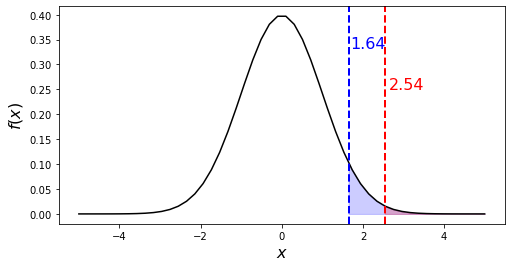

In [126]:
x = df_high['imdb_rating'].values
y = df_low['imdb_rating'].values

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы с более высоким возрастным ограничением имеют более высокие рейтинги IMDb.__

0.9999999999999823

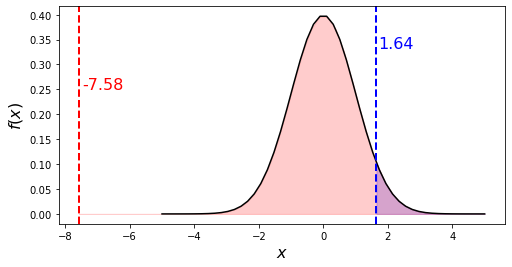

In [127]:
x = df_high['ratingKP'].values
y = df_low['ratingKP'].values

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение попадает в область принятия гипотезы, значит, H0 не отвергается, то есть __нельзя__ сделать вывод о том, что фильмы с более высоким возрастным ограничением имеют более высокие рейтинги Кинопоиска.

### 2. Фильмы, произведенные в России в среднем имеют более высокий рейтинг IMDb, чем фильмы, произведенные в США 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: rating_{russia} = rating_{usa} \\
& H_1: rating_{russia} > rating_{usa}
\end{aligned}
$$

0.48880634038625104

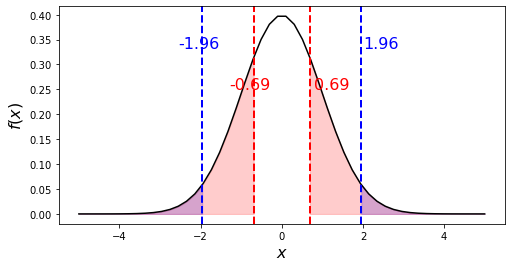

In [128]:
x = df[(df['country'] == 'Россия')]['imdb_rating'].values 
y = df[(df['country'] == 'США')]['imdb_rating'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='two-sided', margin=5)

Значение попадает в область принятия гипотезы, значит, H0 не отвергается, то есть __нельзя__ сделать вывод о том, фильмы, произведенные в России, имеют более высокий рейтинг IMDb, чем фильмы, произведенные в США.

In [129]:
len(df[(df['country'] == 'Россия')])

27

Фильмов российского производства всего 27, давайте посмотрим еще на фильмы, произведенные в СССР.

0.008393868937317528

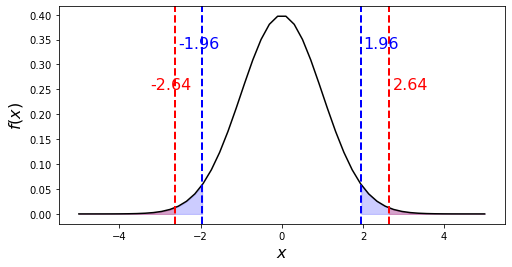

In [130]:
x = df[(df['country'] == 'Россия') | (df['country'] == 'СССР')]['imdb_rating'].values 
y = df[(df['country'] == 'США')]['imdb_rating'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='two-sided', margin=5)

Если проверять не российские фильмы, а российские и советские, то значение теста не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы, произведенные в России и СССР, правда имеют более высокий рейтинг IMDb, чем фильмы, произведенные в США.__

### 3. Чем больше длительность фильма, тем выше у него рейтинг

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: rating_{long} = rating_{short} \\
& H_1: rating_{long} > rating_{short}
\end{aligned}
$$

In [131]:
df.runtime.quantile(0.75)

121.0

За "большую длительность фильма" примем длительность, которая больше, чем у 75% фильмов - это 121 минута.

0.0

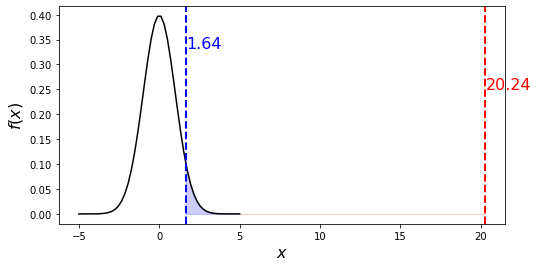

In [132]:
x = df[df.runtime > df.runtime.quantile(0.75)]['imdb_rating'].values 
y = df[df.runtime <= df.runtime.quantile(0.75)]['imdb_rating'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы с большей длительностью правда имеют больший рейтинг.__

### 4. Рейтинг IMDb фильмов, снятых до 2000 года, выше, чем рейтинг IMDb фильмов, снятых после 2000

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: rating_{до2000} = rating_{после2000} \\
& H_1: rating_{до2000} > rating_{после2000}
\end{aligned}
$$

0.0

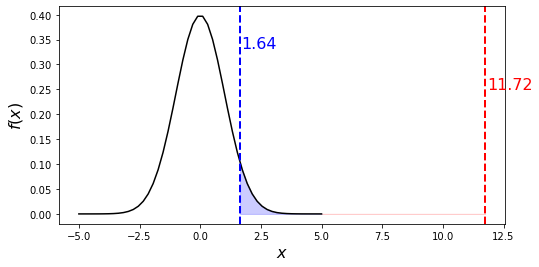

In [133]:
x = df[df.year < 2000]['imdb_rating'].values 
y = df[df.year >= 2000]['imdb_rating'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы, снятые до 2000 года, имеют больший рейтинг, чем фильмы, снятые после 2000 года.__

### 5. Фильмы, имеющие композицию жанров "Action-Adventure", в среденем имеют более высокие сборы, чем фильмы других жанров.

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: gross_{animation+adventure} = gross_{другие-жанры} \\
& H_1: gross_{animation+adventure} > gross_{другие-жанры}
\end{aligned}
$$

Так как значения в столбцах жанров идут по алфавитному порядку, а Action и Adventure - первый и второй по алфавиту жанры среди возможных, можно рассматривать только те фильмы, где в столбце genre_1 стоит "Action", а в столбце genre_2 — "Adventure".

0.0

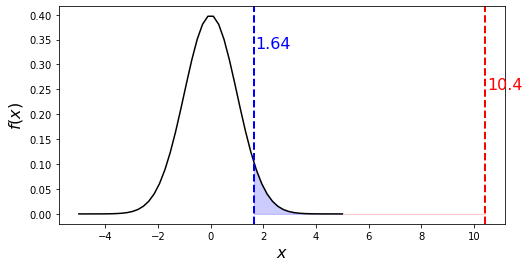

In [134]:
x = df[(df.genre_1 == 'Action') | (df.genre_2 == 'Adventure')]['gross'].values 
y = df.drop(df[df['genre_1'] == 'Action'].index & df[df['genre_2'] == 'Adventure'].index)['gross'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы в жанрах "Action-Adventure", в среденем имеют более высокие сборы, чем фильмы других жанров.__

### 6. Фильмы, выпущенные в период коронавируса, имеют более низкие рейтинги IMDb и Кинопоиска, чем фильмы, выпущенные в другие года 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: rating_{no-covid} = rating_{covid} \\
& H_1: rating_{no-covid} > rating_{covid}
\end{aligned}
$$

Сначала проверим рейтинг IMDb, потом рейтинг Кинопоиска.

0.0

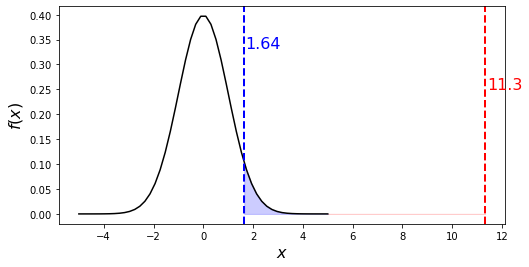

In [135]:
x = df[df.Is_Covid_Period == 0]['imdb_rating'].values 
y = df[df.Is_Covid_Period == 1]['imdb_rating'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы, выпущенные в период коронавируса, имеют более низкие рейтинги IMDb, чем фильмы, выпущенные в другие года.__

0.0

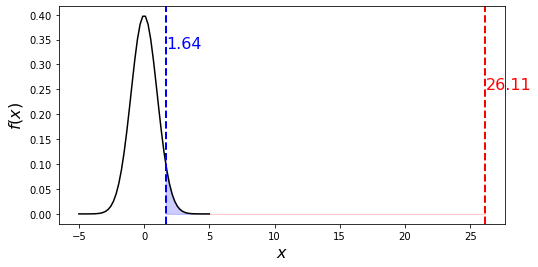

In [136]:
x = df[df.Is_Covid_Period == 0]['ratingKP'].values 
y = df[df.Is_Covid_Period == 1]['ratingKP'].values 

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger', margin=5)

Значение не попадает в область принятия гипотезы, значит, H0 отвергается, то есть __фильмы, выпущенные в период коронавируса, имеют более низкие рейтинги Кинопоиска, чем фильмы, выпущенные в другие года.__

## Шаг 7: Машинное обучение

В качестве целевой переменной мы планируем взять __IMDb рейтинг и  рейтинг КиноПоиска__

Попробуем предсказать обе переменные и на основе полученного результата сделаем выводы о том:

- какой из рейтингов легче предсказывать;
- какие признаки самые важные для этих двух рейтингов;


Соответсвенно, задача, которую мы будем решать - __задача регрессии__

В качестве метрики для оценки качества будем использовать следующую комбинацию:

- __R2__: данная метрика имеет простую интерпретацию, так как принимает значения в диапозоне от 0 до 1
- __MSE__: позволяет измерить среднеквадратичную ошибку между предсказанными и фактическими значениями. Она может быть полезной для оценки точности предсказаний модели и выявления ошибок.


__Модели, которые мы планируем использовать:__

- линейная регрессия
- решающее дерево
- бэггинг
- случайный лес
- градиентный бустинг

План работы для этого шага:
    
1. Закодировать все категориальные признаки
2. Отмасштабировать все признаки
3. Отобрать наиболее релевантные признаки (через sklearn.feature_selection)
4. Построить наилучшую модель для предсказывания индекса IMDb
5. Построить наилучшую модель для предсказания индекса Кинопоиска
6. Подведение итогов

### 1. Кодировка категориальных признаков

In [137]:
df.dtypes

title                     object
year                       int64
runtime                    int64
imdb_rating              float64
votes                      int64
certificate                int64
metascore                  int64
gross                      int64
genre_1                   object
genre_2                   object
genre_3                   object
country                   object
actor_1                   object
actor_2                   object
ratingKP                 float64
Is_Covid_Period            int64
director's experience      int64
title_length               int64
is_blockbuster             int64
dtype: object

__1. Закодированные нами признаки 'actor_1' и 'actor_2' имеют тип 'object', хотя выражены числами. Поменяем их тип на 'int'__

In [138]:
df['actor_1'] = df['actor_1'].astype(int)
df['actor_2'] = df['actor_2'].astype(int)

__2. Название фильма мы не будем использовать для обучения наших моделей,__ так как данный признак не несёт в себе важной информации, влияющей на рейтинг. Кроме того, мы уже имеем новый признак, связанный с названием фильма - 'title_length'

In [139]:
df.drop(['title'], axis=1, inplace=True)

__3. Разберемся с признаком 'country'__

In [140]:
print('Признак содержит в себе', df['country'].nunique(), 'уникальное значение')

Признак содержит в себе 51 уникальное значение


Для кодирования данного признака воспользуемся методом 'One-Hot Encoding'. Из-за использования данного метода у нас сильно увеличится количество признаков, однако данный метод наиболее предпочтителен по сравнению с методом Label Encoding, который превратит признак в порядковый, добавив ему лишнюю информацию

In [141]:
encoder = OneHotEncoder(sparse=False)

encoded_features = encoder.fit_transform(df[['country']])
column_names = encoder.get_feature_names_out(['country'])
df_encoded = pd.DataFrame(encoded_features, columns=column_names)
df = pd.concat([df, df_encoded], axis=1)
df.drop(['country'], axis=1, inplace=True)
df

,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,...,country_Финляндия,country_Франция,country_Чехия,country_Чили,country_Швейцария,country_Швеция,country_Эстония,country_ЮАР,country_Югославия,country_Япония
0,1994,142,9.3,2751184,7,82,28341469,Drama,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,Sci-Fi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999,139,8.8,2190763,9,66,37030102,Drama,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,Romance,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4412,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,Thriller,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4413,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,Horror,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4414,2008,103,6.0,10606,3,52,4859475,Adventure,Family,Fantasy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__4. Теперь посмотрим на признаки 'genre_1', 'genre_2', 'genre_3'__

Удалим признак 'genre_3', так как он содержит много пропусков (мы выяснили это на шаге 3) и не несет в себе наиболее важную информацию об основном жанре фильма

In [142]:
df.drop(['genre_3'], axis=1, inplace=True)

In [143]:
df

,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,actor_1,...,country_Финляндия,country_Франция,country_Чехия,country_Чили,country_Швейцария,country_Швеция,country_Эстония,country_ЮАР,country_Югославия,country_Япония
0,1994,142,9.3,2751184,7,82,28341469,Drama,,159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,148,8.8,2417730,4,74,292576195,Action,Adventure,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999,139,8.8,2190763,9,66,37030102,Drama,,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,142,8.8,2140265,1,82,330252182,Drama,Romance,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,154,8.9,2113490,9,95,107928762,Crime,Drama,653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,2008,102,6.3,10623,5,52,4859475,Comedy,Drama,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4412,2005,90,5.1,10622,7,52,4859475,Horror,Mystery,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4413,2005,98,5.0,10619,7,34,167723,Drama,Fantasy,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4414,2008,103,6.0,10606,3,52,4859475,Adventure,Family,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Относительно признаков 'genre_1', 'genre_2'

Так эти два признака имеют очень много уникальных значений, для их кодирования мы будем использовать следующий метод:

Кодирование средним значением целевой переменной (mean target encoding).

Мы будем заменять каждое уникальное значение признака средним значением целевой переменной для этого значения
Создадим по 2 колонки на каждый признак: для целевой переменной рейтинг IMDb и для целевой переменной рейтинг Кинопоиска

In [144]:
encoder = ce.TargetEncoder(cols=['genre_1', 'genre_2'])

df_imdb = encoder.fit_transform(df, df['imdb_rating'])
df_KP = encoder.fit_transform(df, df['ratingKP'])

In [145]:
df_imdb.head()

,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,actor_1,...,country_Финляндия,country_Франция,country_Чехия,country_Чили,country_Швейцария,country_Швеция,country_Эстония,country_ЮАР,country_Югославия,country_Япония
0,1994,142,9.3,2751184,7,82,28341469,6.904594,6.839628,159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,148,8.8,2417730,4,74,292576195,6.377885,6.315071,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999,139,8.8,2190763,9,66,37030102,6.904594,6.839628,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,142,8.8,2140265,1,82,330252182,6.904594,6.533514,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,154,8.9,2113490,9,95,107928762,6.958055,6.870742,653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df_KP.head()

,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,actor_1,...,country_Финляндия,country_Франция,country_Чехия,country_Чили,country_Швейцария,country_Швеция,country_Эстония,country_ЮАР,country_Югославия,country_Япония
0,1994,142,9.3,2751184,7,82,28341469,7.057416,6.933628,159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,148,8.8,2417730,4,74,292576195,6.708182,6.677929,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999,139,8.8,2190763,9,66,37030102,7.057416,6.933628,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,142,8.8,2140265,1,82,330252182,7.057416,6.946927,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,154,8.9,2113490,9,95,107928762,7.061350,7.064147,653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Масштабирование признаков

Масштабировать признаки будем уже после разбиения на обучающую и тестовые выборки, чтобы обучить масштабирование на обучающей и применить к тестовой, то есть для того, чтобы тестовая выборка действительно оказалась тестовой и совсем не использовалась для обучения

In [147]:
y_im = df_imdb['imdb_rating']
X_im = df_imdb.drop(['imdb_rating', 'ratingKP'], axis=1)
# для предсказывания одного рейтинга второй будем удалять из признаков для чистоты эксперимента

In [148]:
y_kp = df_imdb['ratingKP']
X_kp = df_imdb.drop(['imdb_rating', 'ratingKP'], axis=1)

In [149]:
columns_im = X_im.columns
columns_kp = X_kp.columns

In [150]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_im, y_im, test_size=0.3, random_state=10)
X_train_kp, X_test_kp, y_train_kp, y_test_kp = train_test_split(X_kp, y_kp, test_size=0.3, random_state=10)

In [151]:
scaler = StandardScaler()

scaler.fit(X_train_im)

X_train_im = pd.DataFrame(scaler.transform(X_train_im), columns=columns_im)
X_test_im = pd.DataFrame(scaler.transform(X_test_im), columns=columns_im)

In [152]:
scaler_2 = StandardScaler()

scaler_2.fit(X_train_kp)

X_train_kp = pd.DataFrame(scaler_2.transform(X_train_kp), columns=columns_kp)
X_test_kp = pd.DataFrame(scaler_2.transform(X_test_kp), columns=columns_kp)

In [153]:
X_train_im

,year,runtime,votes,certificate,metascore,gross,genre_1,genre_2,actor_1,actor_2,...,country_Финляндия,country_Франция,country_Чехия,country_Чили,country_Швейцария,country_Швеция,country_Эстония,country_ЮАР,country_Югославия,country_Япония
0,1.182141,-0.873303,-0.597217,0.438820,-1.418672,-0.534203,1.041803,-1.742562,1.041821,0.771210,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
1,-0.713755,-1.022432,-0.138093,0.438820,1.065354,0.067372,-0.514768,1.104614,1.041821,0.771210,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
2,-0.789591,-1.370399,-0.496067,0.802855,-1.534208,-0.295525,-0.695419,-0.643270,1.041821,-1.170482,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
3,0.196275,0.518565,-0.293665,1.166890,0.718746,-0.580488,1.218130,1.104614,-1.271489,-0.504092,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
4,0.499619,-0.724174,-0.585781,-2.109423,-0.263311,-0.534203,1.041803,-0.180317,1.041821,0.771210,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086,-0.713755,1.164790,-0.290631,-0.653284,0.892050,0.066005,1.218130,1.104614,-1.094058,-0.441225,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
3087,-0.182904,-1.022432,0.054689,0.438820,-0.436615,1.010335,-2.061307,-0.485551,-0.083030,0.771210,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
3088,0.423783,-0.624755,-0.552066,0.802855,1.007586,-0.589755,1.041803,0.986064,1.041821,0.771210,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299
3089,-0.637919,-0.376207,-0.041697,0.438820,0.256602,-0.018788,-2.061307,-0.485551,-0.089726,-0.211311,...,-0.040252,-0.21121,-0.031169,-0.01799,-0.035997,-0.069832,-0.025445,-0.035997,-0.01799,-0.090299


### 3. Отбор наиболее релевантных признаков

Будем отбирать по обучающей выборке

In [154]:
# Для IMDb рейтинга
fs = SelectKBest(score_func=f_regression, k="all")
fs.fit(X_train_im, y_train_im)

rate = pd.DataFrame(fs.scores_, columns_im, columns=["score"])
rate = rate.sort_values("score", axis=0)
rate.sort_values('score', ascending=False)[:16]

,score
metascore,2824.145621
votes,664.958347
runtime,647.396874
genre_1,380.875163
year,294.006472
genre_2,291.397168
country_США,122.497148
director's experience,87.572525
gross,55.318961
is_blockbuster,47.797078


In [155]:
# Наименее важные для рейтинга IMDb
rate.sort_values('score')[:10]
# Удалим их из наших выборок

,score
country_Ливан,0.000000
country_Казахстан,0.000000
country_ОАЭ,0.000000
country_Таиланд,0.002803
country_Исландия,0.002803
country_Литва,0.037367
country_Израиль,0.049440
country_Чехия,0.112175
country_Марокко,0.185062
country_Финляндия,0.187084


In [156]:
delete_im = list(rate.sort_values('score')[:10].index)
X_train_im = X_train_im.drop(delete_im, axis=1)
X_test_im = X_test_im.drop(delete_im, axis=1)

In [157]:
# Для рейтинга Кинопоиска
fs = SelectKBest(score_func=f_regression, k="all")
fs.fit(X_train_kp, y_train_kp)

rate = pd.DataFrame(fs.scores_, columns_im, columns=["score"])
rate = rate.sort_values("score", axis=0)
rate.sort_values('score', ascending=False)[:16]

,score
metascore,712.656572
runtime,630.108614
year,607.740249
votes,506.168560
genre_1,308.793341
genre_2,229.554429
director's experience,113.691771
gross,107.262809
Is_Covid_Period,106.187644
actor_1,78.855805


In [158]:
# Наименее важные для рейтинга Кинопоиска
rate.sort_values('score')[:10]
# Удалим их из наших выборок

,score
country_Ливан,0.000000
country_Казахстан,0.000000
country_ОАЭ,0.000000
country_Россия,0.000512
country_Литва,0.009316
country_Испания,0.024544
country_Ирландия,0.036168
country_Индонезия,0.039211
country_Австрия,0.065792
country_Таиланд,0.073734


In [159]:
delete_kp = list(rate.sort_values('score')[:10].index)
X_train_kp = X_train_kp.drop(delete_kp, axis=1)
X_test_kp = X_test_kp.drop(delete_kp, axis=1)

### 4. Построение наилучшей модели для предсказывания рейтинга IMDb

__Линейная регрессия__

Начнем с построения линейной регрессии

In [169]:
lr = LinearRegression()

lr.fit(X_train_im, y_train_im)

pred_train_im = lr.predict(X_train_im)
pred_test_im = lr.predict(X_test_im)

print ("Test MSE: {}".format(mean_squared_error(y_test_im, pred_test_im)))
print ("Test R2: {}".format(r2_score(y_test_im, pred_test_im)))

Test MSE: 0.299336314714822
Test R2: 0.6416368140957647


Оценим влияние признаков на результат по полученным коэффициентам

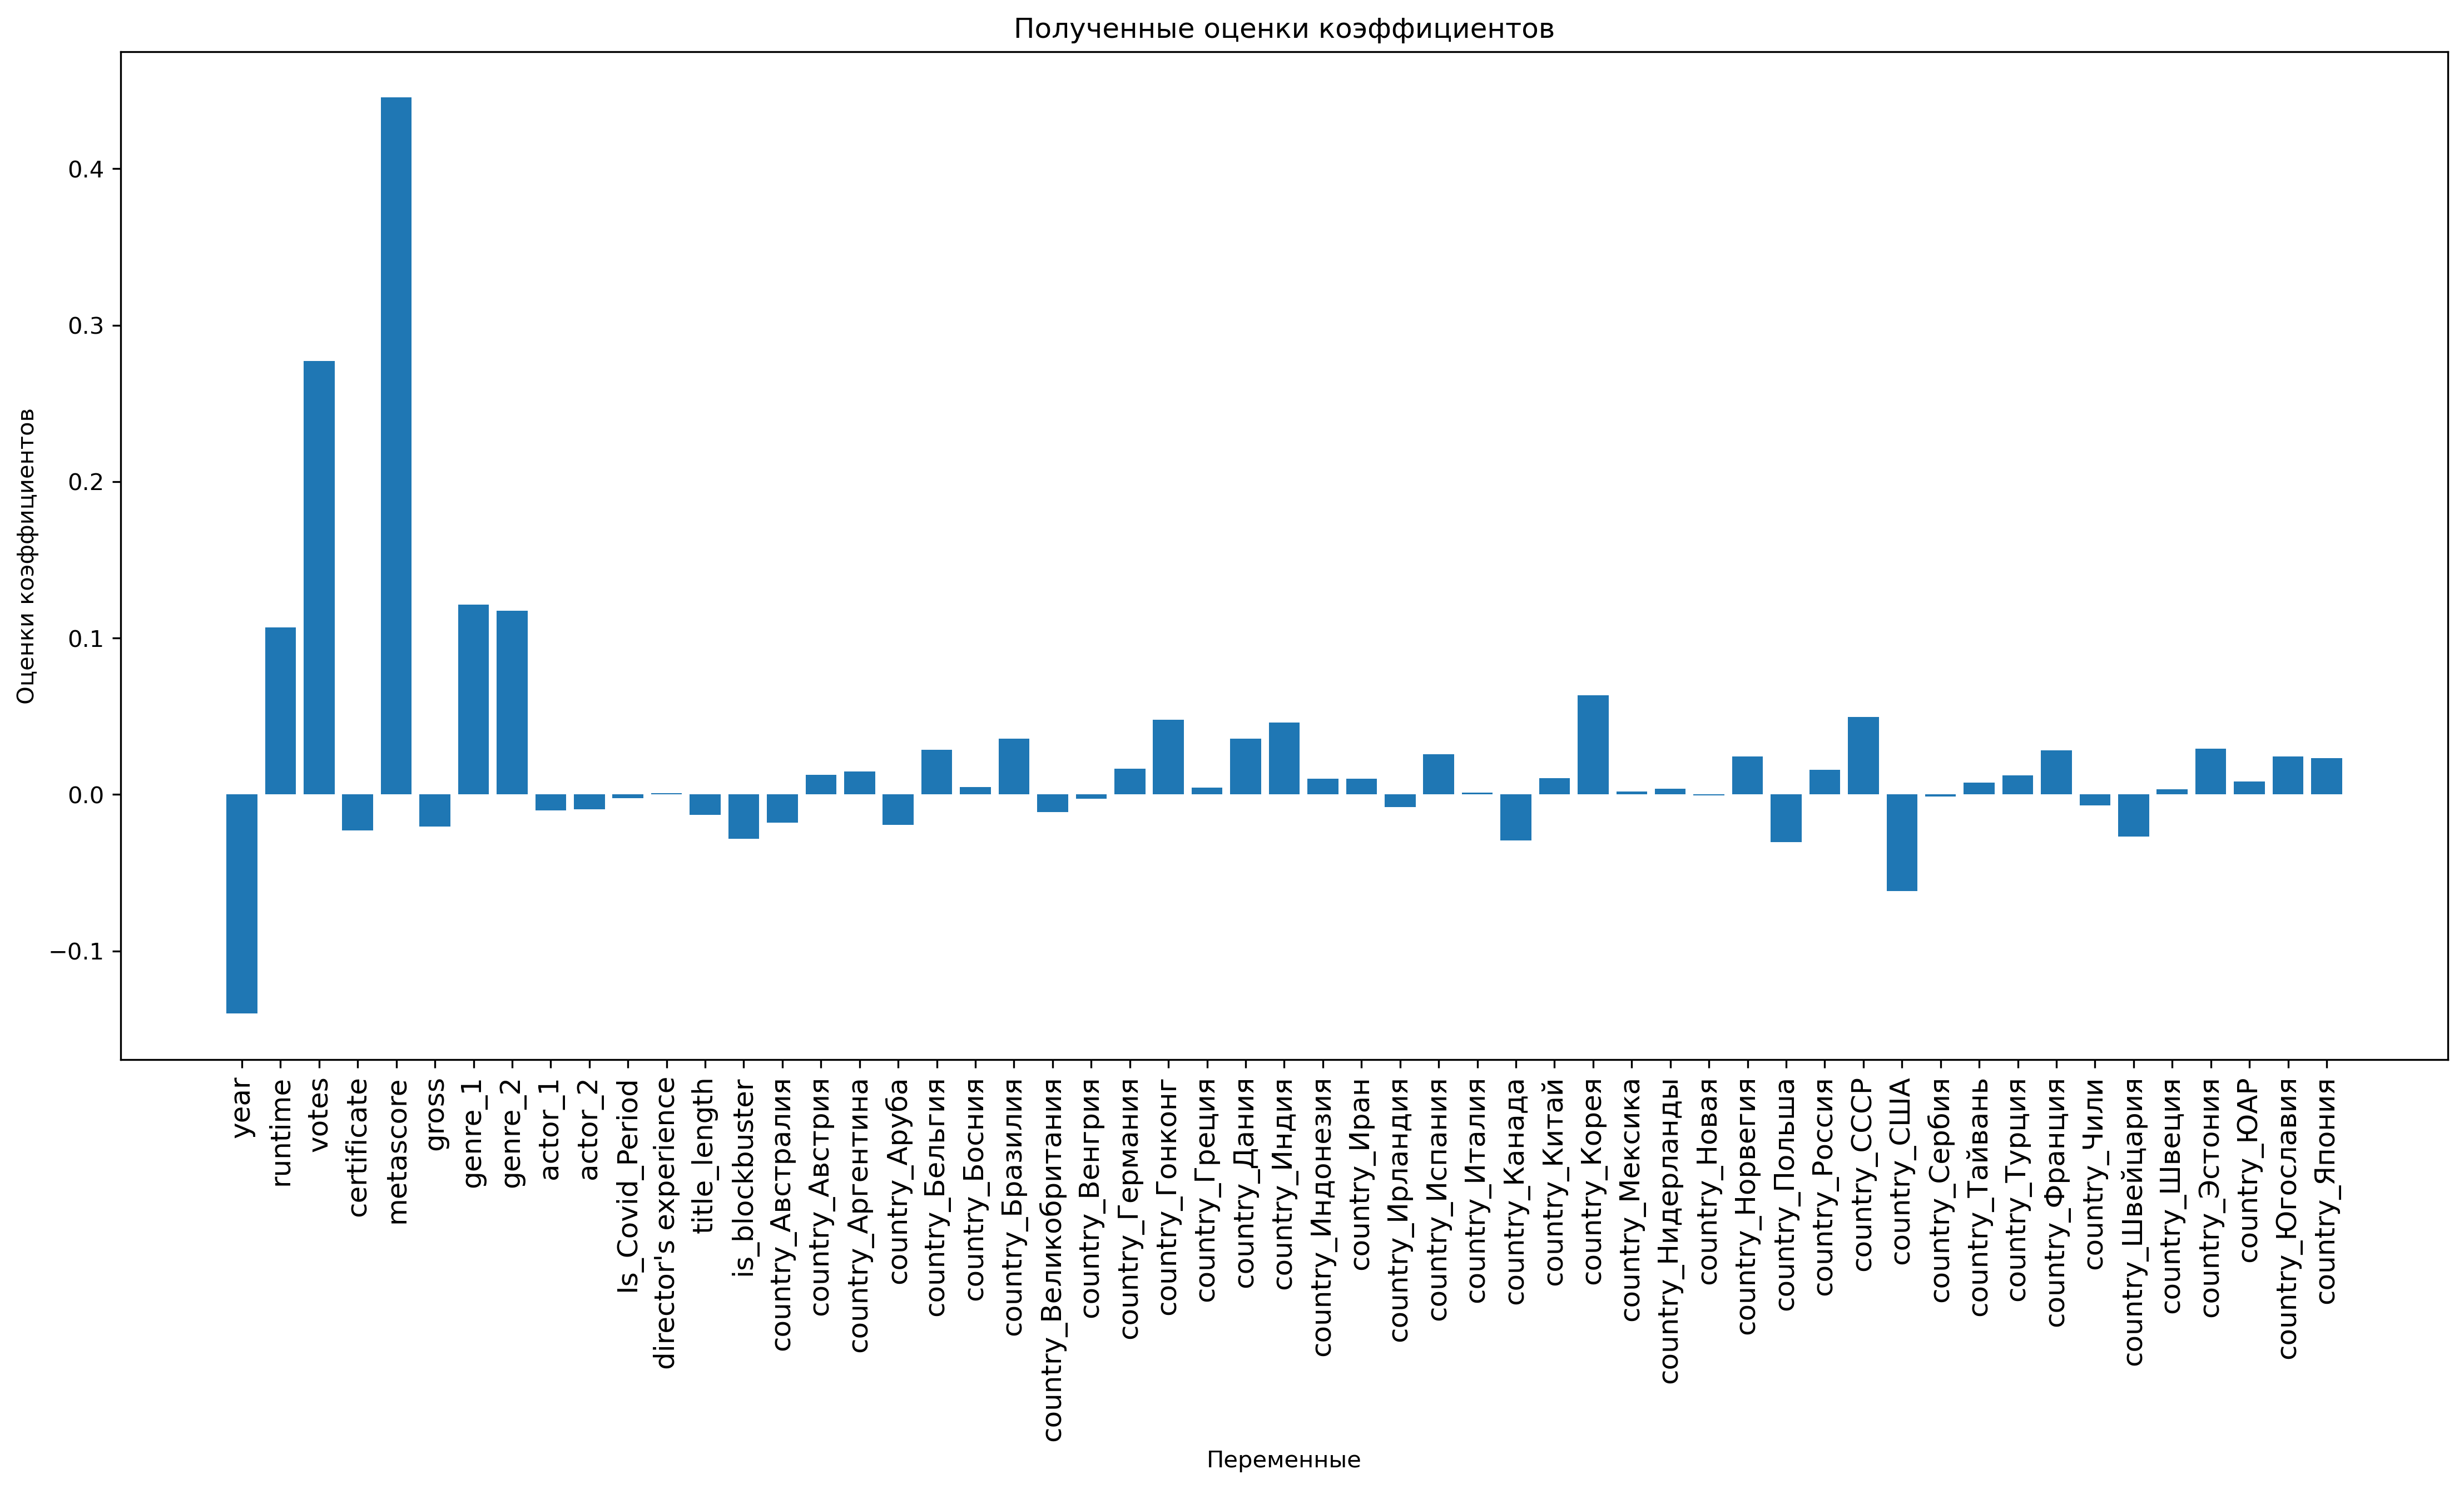

In [176]:
plt.figure(figsize=(18, 8), dpi=300)
plt.bar(x=X_train_im.columns, height=lr.coef_)
plt.xticks(X_train_im.columns, size=12, rotation = 90)
plt.title('Полученные оценки коэффициентов')
plt.xlabel('Переменные')
plt.ylabel('Оценки коэффициентов');

Видим, что оценки коэффициентов следующих признаков на порядок превышают оценки коэффициентов прочих переменных:

- metascore
- votes
- genre_1
- genre_2
- runtime
- yeae

Различия в порядке коэффициентов, выявленные при помощи графиков могут намекать на необходимость использования регуляризации. Попробуем обучить Ridge-регрессию

In [188]:
alpha = 10

ridge = Ridge(alpha)

ridge.fit(X_train_im, y_train_im)

ridge_pred_test_im = ridge.predict(X_test_im)

print ("Test with Ridge MSE: {}".format(mean_squared_error(y_test_im, ridge_pred_test_im)))
print ("Test with Ridge R2: {}".format(r2_score(y_test_im, ridge_pred_test_im)))

Test with Ridge MSE: 0.2992141019016482
Test with Ridge R2: 0.6417831263570384


Попробуем подобрать гиперпараметр alpha при помощи кросс-валидации

In [196]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 50, 80, 90, 100, 110, 150, 200]} 
ridge = Ridge(alpha)

grid_search = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
grid_search.fit(X_train_im, y_train_im)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha: {}".format(best_alpha))

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_im, y_train_im)

ridge_pred_test_im = ridge_best.predict(X_test_im)

print("Test with Ridge MSE: {}".format(mean_squared_error(y_test_im, ridge_pred_test_im)))
print("Test with Ridge R2: {}".format(r2_score(y_test_im, ridge_pred_test_im)))


Best alpha: 90
Test with Ridge MSE: 0.2984905940451621
Test with Ridge R2: 0.6426493045243087


Видим незначительное улучшение R2 и MSE

Теперь попробуем обучить Lasso-регрессию на лучших подобранных гиперпараметрах

Мы знаем, что Lasso регуляризация умеет занулять неважные параметры и сильно улучшать эффективность модели. Проверим на наших данных

In [208]:
parameters = {'alpha': [0.005, 0.001, 0.05, 0.01, 0.1, 1, 10, 50, 80, 90, 100, 110, 150, 200]} 
lasso = Lasso(alpha)

grid_search = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
grid_search.fit(X_train_im, y_train_im)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha: {}".format(best_alpha))

lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_im, y_train_im)

lasso_pred_test_im = lasso_best.predict(X_test_im)

print("Test with Lasso MSE: {}".format(mean_squared_error(y_test_im, lasso_pred_test_im)))
print("Test with Lasso R2: {}".format(r2_score(y_test_im, lasso_pred_test_im)))


Best alpha: 0.005
Test with Lasso MSE: 0.29617327975511304
Test with Lasso R2: 0.6454235757734037


Снова видим незначительное ухудшение показателя R2 отонисительно результата Ridge-регрессии и улучшение MSE

Можем предположить, что для построения нашей модели использование регуляризаторов не требуется, так как модель не страдает от переобучения

__Для этого пункта использовались следующие источники:__

- Семинар ИАДа 6 по линейной регрессии: https://github.com/hse-ds/iad-intro-ds/blob/master/2023/seminars/sem06_linreg/sem06_linreg_solution.ipynb
- Решенное одним из студентов нашей команды ДЗ_4 ИАДа: https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw04-knn-linreg/hw04_knn_linreg.ipynb

__Решающее дерево__

Можем предположить, что наша целевая переменная не зависит линейно от признаков, поэтому попробуем применить модель "решающее дерево", которое может найти логические правила и нелинейные зависимости для успешного решения задачи предсказывания рейтинга IMDb

In [211]:
parameters = {'max_depth': [None, 30, 25, 20, 15, 10, 5, 3, 1],
              'min_samples_split': [1, 5, 10, 15, 20, 25, 30, 35, 40],
              'min_samples_leaf': [1, 2, 4, 10, 20],
              'max_features': ['auto', 'sqrt', 'log2']}

tree = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=tree, param_grid=parameters, scoring='r2')

grid_search.fit(X_train_im, y_train_im)

best_params = grid_search.best_params_

best_tree = DecisionTreeRegressor(**best_params)

best_tree.fit(X_train_im, y_train_im)

pred_test_im = best_tree.predict(X_test_im)

print("Best params:", best_params)
print("Test DT MSE: {}".format(mean_squared_error(y_test_im, pred_test_im)))
print("Test DT R2: {}".format(r2_score(y_test_im, pred_test_im)))

Best params: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 30}
Test DT MSE: 0.33575643139707334
Test DT R2: 0.5980349241690784


Видим ухудшение MSE (увеличение) и ухудшение R2 (уменьшение) относительно результатов обучения линейной регрессии с Lasso регуляризацией

- Test with Lasso MSE: 0.29617327975511304
- Test with Lasso R2: 0.6454235757734037

__Бэггинг__

Мы знаем, что решающие деревья очень неустойчивы и склонны к переобучению. Однако при этом умеют классно подстраиваться под конкретные данные и приближаться к идеальной модели. Решением этих проблем при сохранении преимущетсв является построение композиции решающих деревьев. Построим композицию деревьев на основе модели Бэггинга

In [215]:
base_model = DecisionTreeRegressor()

bagging_model = BaggingRegressor(base_model)

param_grid = {
    'n_estimators': [5, 10, 20, 50, 100],  
    'max_samples': [0.5, 0.66, 0.8, 1.0],  
    'max_features': [0.5, 0.66, 0.8, 1.0]  
}

grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, scoring='r2')

grid_search.fit(X_train_im, y_train_im)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_samples = grid_search.best_params_['max_samples']
best_max_features = grid_search.best_params_['max_features']

bagging_model = BaggingRegressor(base_model,
                                 n_estimators=best_n_estimators,
                                 max_samples=best_max_samples,
                                 max_features=best_max_features)

bagging_model.fit(X_train_im, y_train_im)

pred_test_im = bagging_model.predict(X_test_im)

print("Best params:", grid_search.best_params_)
print("Test Bag MSE: {}".format(mean_squared_error(y_test_im, pred_test_im)))
print("Test Bag R2: {}".format(r2_score(y_test_im, pred_test_im)))

Best params: {'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 100}
Test Bag MSE: 0.26137162071278813
Test Bag R2: 0.6870878603793067


Ура! Видим улучшение качеста модели по сравненеию с предыдущим наилучшим результатом Lasso регрессии:

- Test with Lasso MSE: 0.29617327975511304 (MSE уменьшился на 0.0369)
- Test with Lasso R2: 0.6454235757734037 (R2 увеличился на 0.0442)

__Случайный лес:__

По предыдущему пункту мы видим, что композиция из деревьев действительно хорошо срабатывает и дает улучшение качества. Попробуем пойти дальше и обучить Случайный лес - модель, которая похожа на бэггинг, но при обучении для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков. Тем самым увеличивается независимость обучаемых моделей, что положительно влияет на итоговый результат

In [217]:
n_estimators = [50]
max_depth = [None, 20, 10, 5, 3, 1]
min_samples_split = [2, 10, 20, 30, 40]

rf = RandomForestRegressor()

param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2')

grid_search.fit(X_train_im, y_train_im)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

rf = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split)

rf.fit(X_train_im, y_train_im)

pred_test_im = rf.predict(X_test_im)

print("Best params:", grid_search.best_params_)
print("Test Bag MSE: {}".format(mean_squared_error(y_test_im, pred_test_im)))
print("Test Bag R2: {}".format(r2_score(y_test_im, pred_test_im)))

Best params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Test Bag MSE: 0.25871316624805046
Test Bag R2: 0.6902705420812323


Качество модели снова улучшилось, но не сильно. Сравним с предыдущим лучшим результатом:

- Test Bag MSE: 0.26137162071278813 (MSE уменьшился на 0.002658)
- Test Bag R2: 0.6870878603793067 (R2 увеличился на 0.00318)

__Градиентный бустинг:__

In [221]:
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10]
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2')

grid_search.fit(X_train_im, y_train_im)

best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']

gbr = GradientBoostingRegressor(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth
)

gbr.fit(X_train_im, y_train_im)

gbr_pred_test_im = gbr.predict(X_test_im)

print("Best params:", grid_search.best_params_)
print("Test with Gradient Boosting MSE: {}".format(mean_squared_error(y_test_im, gbr_pred_test_im)))
print("Test with Gradient Boosting R2: {}".format(r2_score(y_test_im, gbr_pred_test_im)))


Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Test with Gradient Boosting MSE: 0.2508403895240615
Test with Gradient Boosting R2: 0.6996957711965479


По результатам градиентного бустинга видим наш лучший результат, поэтому будем использовать данную модель как финальную


Однако стоит отметить, что результат получился не идеальный (R2 0.7 из 1), что говорит о том, что предсказывать индекс IMDb сложно и он зависит от большего количества признаков, чем мы использовали

Для данных пунктов использовались следующие источники:
    
- семинар 12 ИАДа (https://github.com/hse-ds/iad-intro-ds/tree/master/2023/seminars/sem12_trees)
- семинар 13 ИАДа (https://github.com/hse-ds/iad-intro-ds/tree/master/2023/seminars/sem13_rf)
- выполненное ДЗ 7 ИАДа (https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/hw07-trees-rf.ipynb)

### 5. Построение наилучшей модели для предсказывания рейтинга Кинопоиска

Повторим все то же самое, но с данными, которые мы подготовили для предсказывания рейтинга Кинопоиска

__Линейная регрессия__

In [223]:
lr = LinearRegression()

lr.fit(X_train_kp, y_train_kp)

pred_train_kp = lr.predict(X_train_kp)
pred_test_kp = lr.predict(X_test_kp)

print ("Test MSE: {}".format(mean_squared_error(y_test_kp, pred_test_kp)))
print ("Test R2: {}".format(r2_score(y_test_kp, pred_test_kp)))

Test MSE: 0.3187512424507437
Test R2: 0.47040891833755083


Видим, что для линейной регрессии для рейтинга Кинопоиска результаты хуже, чем для рейтинга IMDb

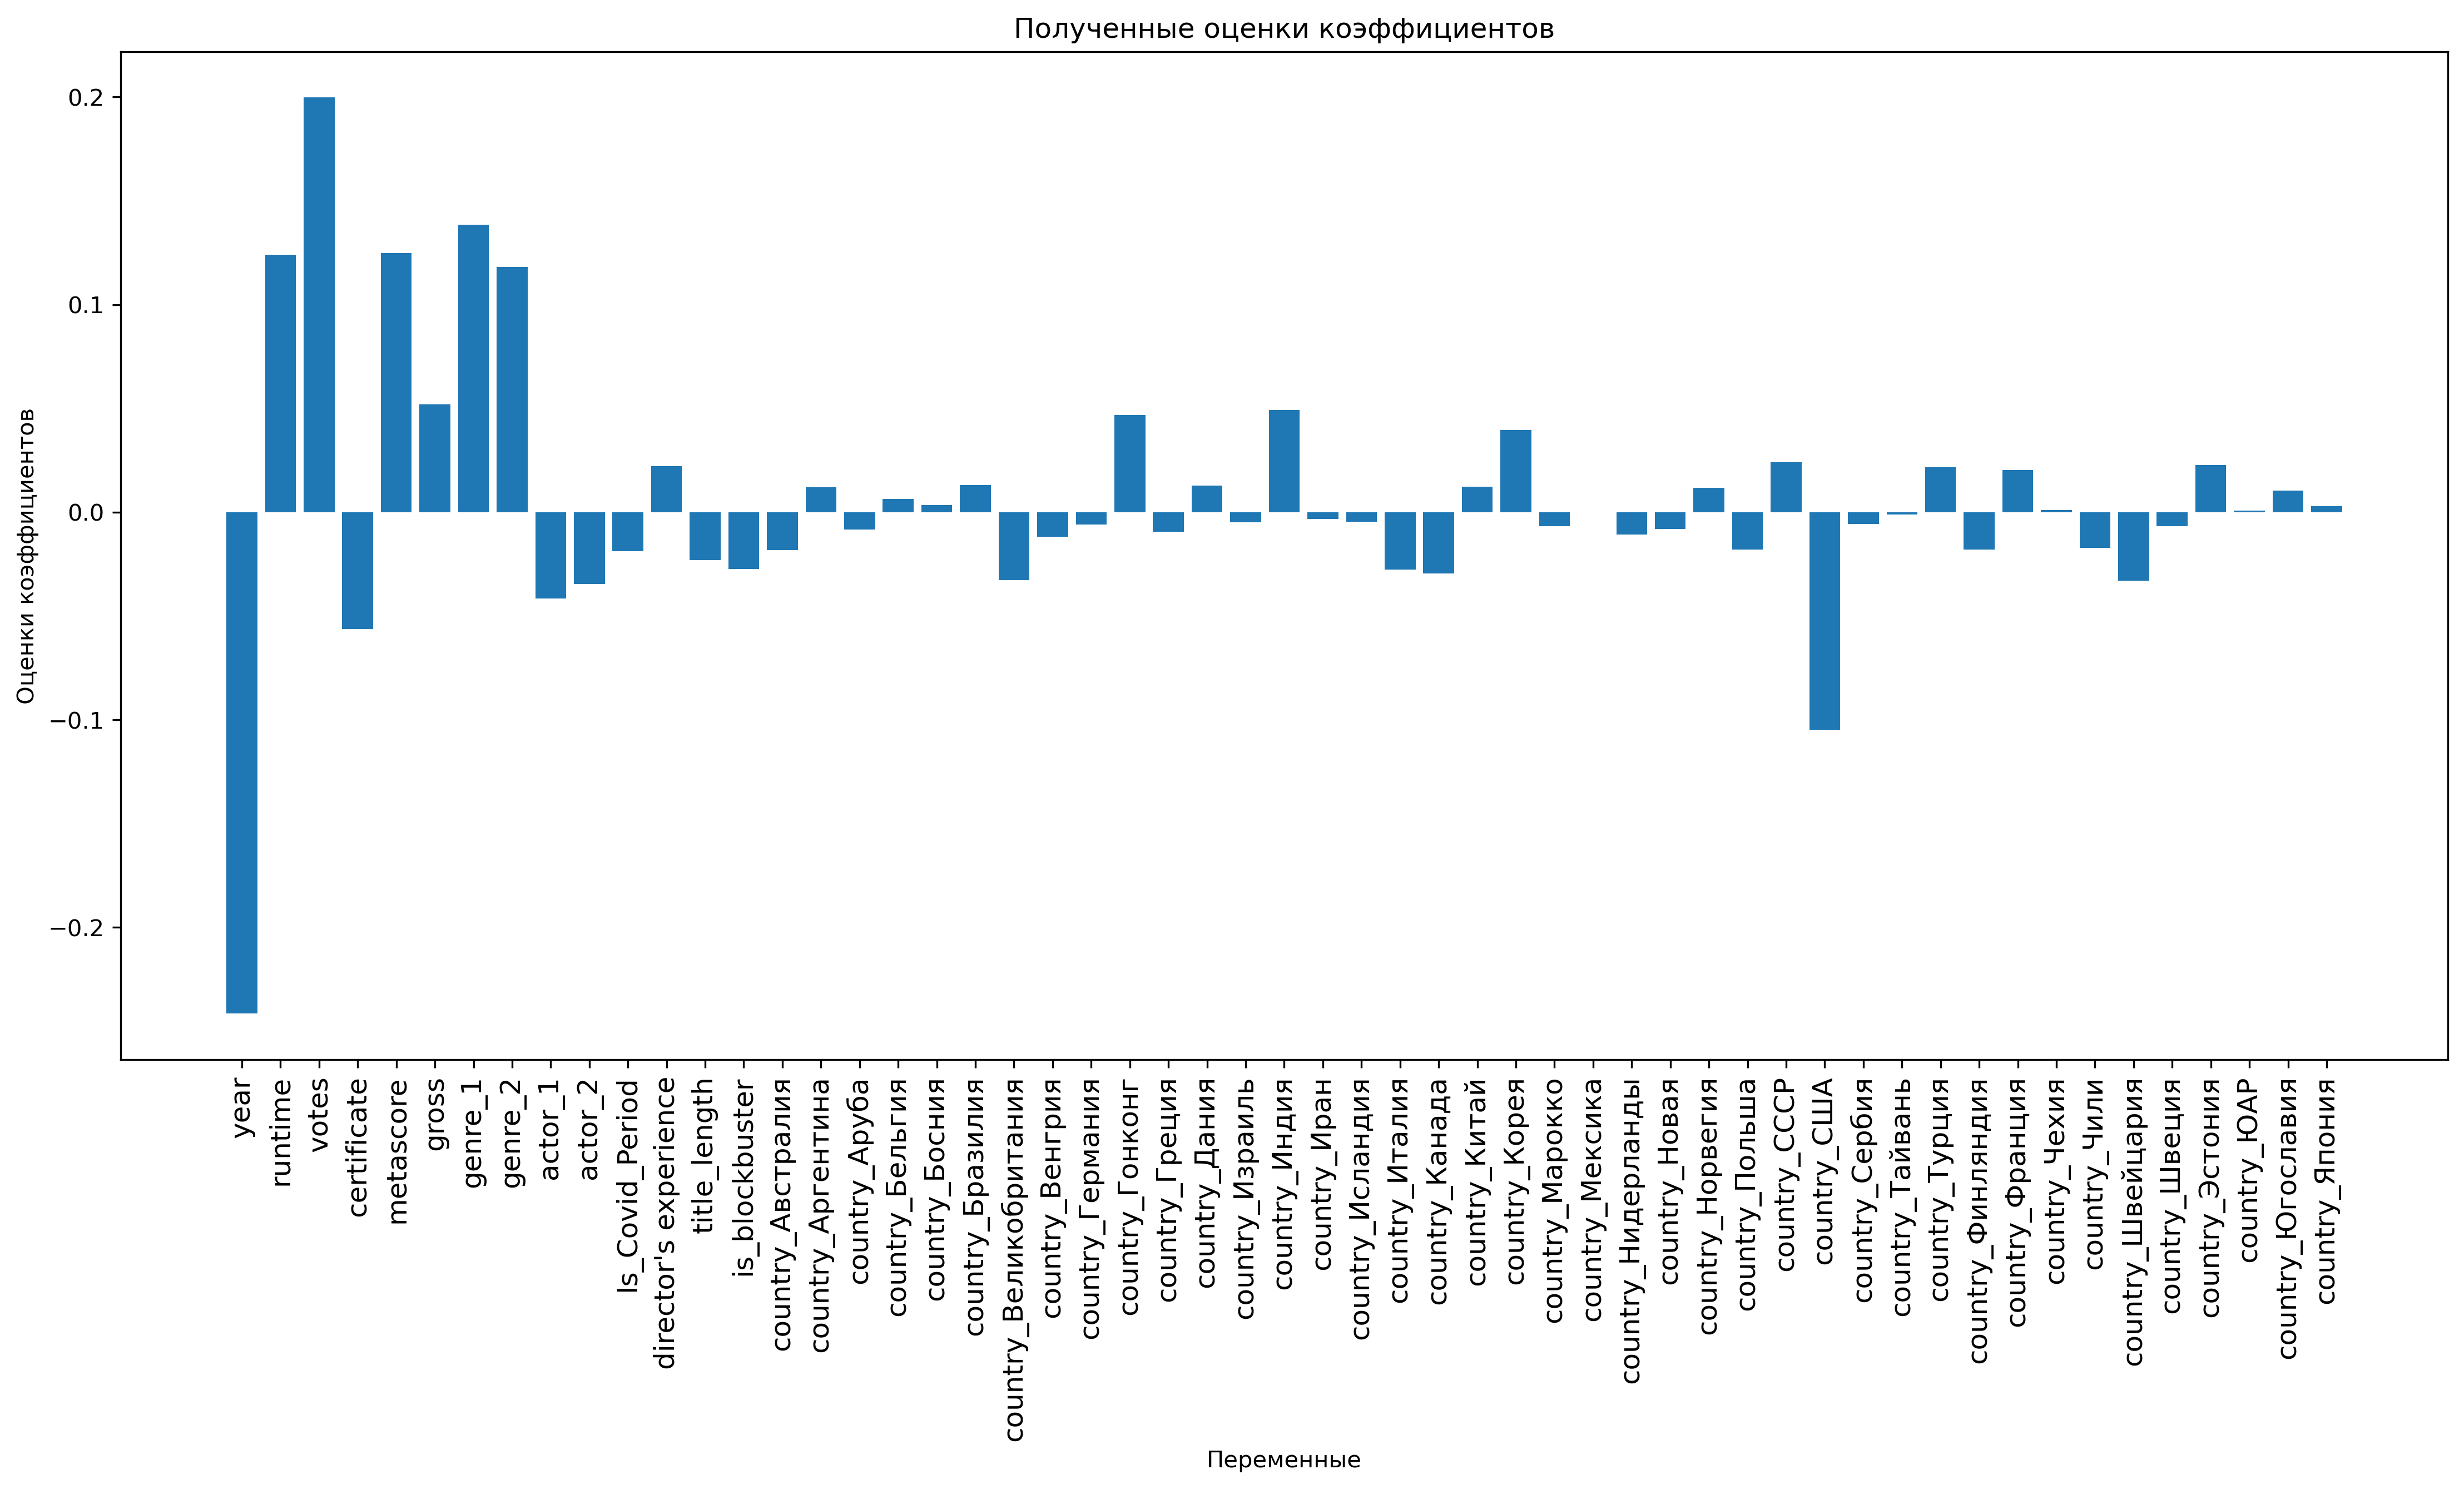

In [224]:
plt.figure(figsize=(18, 8), dpi=300)
plt.bar(x=X_train_kp.columns, height=lr.coef_)
plt.xticks(X_train_kp.columns, size=12, rotation = 90)
plt.title('Полученные оценки коэффициентов')
plt.xlabel('Переменные')
plt.ylabel('Оценки коэффициентов');

Наиболее важные признаки для предсказывания рейтинга Кинопоиска:

- year (причем зависимость отрицательная)
- votes
- runtime
- metascore
- genre_1
- genre_2
- country_США

Видим, что большинство признаков схожи с важными признаками для рейтинга IMDb (добавилась важность для признака 'country_США'

Попробуем использовать регуляризацию

__Ridge-регрессия__

In [226]:
alpha = 10

ridge = Ridge(alpha)

ridge.fit(X_train_kp, y_train_kp)

ridge_pred_test_kp = ridge.predict(X_test_kp)

print ("Test with Ridge MSE: {}".format(mean_squared_error(y_test_kp, ridge_pred_test_kp)))
print ("Test with Ridge R2: {}".format(r2_score(y_test_kp, ridge_pred_test_kp)))

Test with Ridge MSE: 0.31859202570937534
Test with Ridge R2: 0.4706734499065316


__Lasso-регрессия__

In [227]:
parameters = {'alpha': [0.005, 0.001, 0.05, 0.01, 0.1, 1, 10, 50, 80, 90, 100, 110, 150, 200]} 
lasso = Lasso(alpha)

grid_search = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
grid_search.fit(X_train_kp, y_train_kp)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha: {}".format(best_alpha))

lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_kp, y_train_kp)

lasso_pred_test_kp = lasso_best.predict(X_test_kp)

print("Test with Lasso MSE: {}".format(mean_squared_error(y_test_kp, lasso_pred_test_kp)))
print("Test with Lasso R2: {}".format(r2_score(y_test_kp, lasso_pred_test_kp)))


Best alpha: 0.005
Test with Lasso MSE: 0.31477410648819876
Test with Lasso R2: 0.4770167537145322


Как и в случае с рейтингом IMDb наилучший результат показала Lasso-регрессия

__Решающее дерево:__

In [228]:
parameters = {'max_depth': [None, 30, 25, 20, 15, 10, 5, 3, 1],
              'min_samples_split': [1, 5, 10, 15, 20, 25, 30, 35, 40],
              'min_samples_leaf': [1, 2, 4, 10, 20],
              'max_features': ['auto', 'sqrt', 'log2']}

tree = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=tree, param_grid=parameters, scoring='r2')

grid_search.fit(X_train_kp, y_train_kp)

best_params = grid_search.best_params_

best_tree = DecisionTreeRegressor(**best_params)

best_tree.fit(X_train_kp, y_train_kp)

pred_test_kp = best_tree.predict(X_test_kp)

print("Best params:", best_params)
print("Test DT MSE: {}".format(mean_squared_error(y_test_kp, pred_test_kp)))
print("Test DT R2: {}".format(r2_score(y_test_kp, pred_test_kp)))

Best params: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 40}
Test DT MSE: 0.3616866062514302
Test DT R2: 0.39907371166681915


Видим сильное ухудшение качества, как и с ситуацией предсказывания рейтинга IMDb

__Бэггинг:__

In [230]:
base_model = DecisionTreeRegressor()

bagging_model = BaggingRegressor(base_model)

param_grid = {
    'n_estimators': [5, 10, 20, 50, 100],  
    'max_samples': [0.5, 0.66, 0.8, 1.0],  
    'max_features': [0.5, 0.66, 0.8, 1.0]  
}

grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, scoring='r2')

grid_search.fit(X_train_kp, y_train_kp)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_samples = grid_search.best_params_['max_samples']
best_max_features = grid_search.best_params_['max_features']

bagging_model = BaggingRegressor(base_model,
                                 n_estimators=best_n_estimators,
                                 max_samples=best_max_samples,
                                 max_features=best_max_features)

bagging_model.fit(X_train_kp, y_train_kp)

pred_test_kp = bagging_model.predict(X_test_kp)

print("Best params:", grid_search.best_params_)
print("Test Bag MSE: {}".format(mean_squared_error(y_test_kp, pred_test_kp)))
print("Test Bag R2: {}".format(r2_score(y_test_kp, pred_test_kp)))

Best params: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}
Test Bag MSE: 0.2777652922475472
Test Bag R2: 0.5385052605955054


Ура, качество модели сильно лучше предыдущего пункта. Но R2=0.54 все равно не самый лучший результат

__Случайный лес:__

In [232]:
n_estimators = [100]
max_depth = [None, 20, 10, 5, 3, 1]
min_samples_split = [2, 10, 20, 30, 40]

rf = RandomForestRegressor()

param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2')

grid_search.fit(X_train_kp, y_train_kp)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

rf = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split)

rf.fit(X_train_kp, y_train_kp)

pred_test_kp = rf.predict(X_test_kp)

print("Best params:", grid_search.best_params_)
print("Test Bag MSE: {}".format(mean_squared_error(y_test_kp, pred_test_kp)))
print("Test Bag R2: {}".format(r2_score(y_test_kp, pred_test_kp)))

Best params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Test Bag MSE: 0.27677250543075993
Test Bag R2: 0.5401547319516644


Ожидаемо, но качество модели "Случайный лес" показал немного более лучшее качество, чем модель "Бэггинг"

__Градиентный бустинг:__

In [233]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 10]
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2')

grid_search.fit(X_train_kp, y_train_kp)

best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']

gbr = GradientBoostingRegressor(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth
)

gbr.fit(X_train_kp, y_train_kp)

gbr_pred_test_kp = gbr.predict(X_test_kp)

print("Best params:", grid_search.best_params_)
print("Test with Gradient Boosting MSE: {}".format(mean_squared_error(y_test_kp, gbr_pred_test_kp)))
print("Test with Gradient Boosting R2: {}".format(r2_score(y_test_kp, gbr_pred_test_kp)))


Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test with Gradient Boosting MSE: 0.2696092136664926
Test with Gradient Boosting R2: 0.5520562241765561


Градиентный бустинг показал наилучший результат для предсказания рейтинга КиноПоиска

Однако этот результат все равно далёк от идеала

### 6. Выводы

1) Мы видим, что для предсказывания обоих рейтингов важны примерно одни и те же признаки (что в целом логично, так как они несут в себе основную информацию о успехе фильма)

Важны следующие признаки:
- metascore
- votes
- genre_1
- genre_2
- runtime
- year
- country_США (только для рейтинга Кинопоиска)


Можем заметить, что созданные нами в шаге 5 признаки, к сожалению, не попали в список важных

2) Лучшее качество моделей для предсказывания индексов все равно показывает достаточно низкий результат. Исходя их этого можно сделать следующие выводы:

- рейтинги IMDb и Кинопоиска достаточно сложны для предсказывания
- рейтинги IMDb и Кинопоиска построены на субъективной оценки пользователей и такую оценку сложно предсказать, исходя из имеющихся у нас признаков
- качество моделей, предсказывающих IMDb рейтинг, выше, чем предсказывающих рейтинг Кинопоиска, из чего можно сделать вывод, что рейтинг IMDb основан на более объективных и предсказуемых алгоритмах

### Конец!